In [1]:
%reset
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']="False"
# Change the current working directory to the desired path
os.chdir('/mnt/home/spandey/ceph/GODMAX/src/')
from jax.config import config
config.update("jax_enable_x64", True)
import numpy as np
import jax.numpy as jnp
import colossus 
from jax import vmap, grad
%matplotlib inline
import matplotlib.pyplot as pl
pl.rc('text', usetex=False)
# Palatino
pl.rc('font', family='DejaVu Sans')

%load_ext autoreload
%autoreload 2




/tmp/ipykernel_833941/3102531464.py:7: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [2]:
# cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 'w0':-1.0}
# sim_params_dict = {}
# sim_params_dict['nfw_trunc'] = True
# sim_params_dict['gamma_rhogas'] = 2.0
# sim_params_dict['delta_rhogas'] = 7.0
# sim_params_dict['theta_co'] = 0.1
# sim_params_dict['theta_ej'] = 4.0
# sim_params_dict['neg_bhse_plus_1'] = 0.833
# sim_params_dict['mu_beta'] = 0.21
# sim_params_dict['eta_star'] = 0.3
# sim_params_dict['eta_cga'] = 0.6
# sim_params_dict['A_starcga'] = 0.09
# sim_params_dict['log10_M1_starcga'] = 11.4
# sim_params_dict['epsilon_rt'] = 4.0
# sim_params_dict['log10_Mc0'] = 14.83
# sim_params_dict['nu_z'] = 0.0
# sim_params_dict['nu_M'] = 0.0
# sim_params_dict['log10_Mstar0'] = 13.0
# sim_params_dict['a_zeta'] = 0.3
# sim_params_dict['n_zeta'] = 2
# sim_params_dict['alpha_nt'] = 0.18
# sim_params_dict['beta_nt'] = 0.5
# sim_params_dict['n_nt'] = 0.3
# sim_params_dict['cosmo'] = cosmo_params_dict
# sim_params_dict['gamma_rhogas'] = 2.0
# sim_params_dict['delta_rhogas'] = 7.0


# halo_params_dict = {}
# halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 1e-3, 6, 63
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 12.0, 15.0, 64
# halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 1, 10, 64
# halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 64
# halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.2
# halo_params_dict['mdef'] = '200c'
# halo_params_dict['hmf_model'] = 'T10'
# halo_params_dict['conc_model'] = 'Diemer15'
# halo_params_dict['do_corr_2h_mm'] = True

# # halo_params_dict['do_corr_2h_mm'] = False

# from astropy.io import fits
# df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/sim_3x2pt_simulated_DV_PKproject_values_bestfit_maglim_3x2LCDM_final.fits') 
# z_array = df['nz_source'].data['Z_MID']
# nz_info_dict = {}
# nz_info_dict['z_array'] = z_array
# nz_info_dict['nbins'] = 4
# nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
# nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
# nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
# nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
# analysis_dict = {}
# analysis_dict['nz_info_dict'] = nz_info_dict
# analysis_dict['do_sheary'] = True
# analysis_dict['do_shear2pt'] = True
# analysis_dict['do_yy'] = False

# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DES_ACT_full_data_theorycov_2.5.fits')
# theta_data = df_data['compton_shear'].data['ANG'][0:20]

# analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
# analysis_dict['angles_data_array'] = jnp.array(theta_data)
# analysis_dict['beam_fwhm_arcmin'] = 1.6
# analysis_dict['want_like_diff'] = False
# analysis_dict['calc_nfw_only'] = True





In [66]:
# cosmo_params_dict = {'flat': True, 'H0': 70.0, 'Om0': 0.2793, 'Ob0': 0.0463, 'sigma8': 0.821, 'ns': 0.972, 'w0':-1.0}
cosmo_params_dict = {'flat': True, 'H0': 67.2, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95, 'w0':-1.0}
sim_params_dict = {}
sim_params_dict['nfw_trunc'] = True
sim_params_dict['gamma_rhogas'] = 2.0
sim_params_dict['delta_rhogas'] = 7.0
# sim_params_dict['theta_co'] = 0.01
# sim_params_dict['theta_ej'] = 1.0

sim_params_dict['theta_co_0'] = 0.1
sim_params_dict['log10_Mstar0_theta_co'] = 14.0
sim_params_dict['nu_theta_co_M'] = 0.0
sim_params_dict['nu_theta_co_z'] = 0.0

sim_params_dict['theta_ej_0'] = 4.0
sim_params_dict['log10_Mstar0_theta_ej'] = 14.0
sim_params_dict['nu_theta_ej_M'] = 0.0
sim_params_dict['nu_theta_ej_z'] = 0.0

sim_params_dict['log10_Mc0'] = 14.83
sim_params_dict['log10_Mstar0'] = 14.0
sim_params_dict['mu_beta'] = 0.21
sim_params_dict['nu_z'] = 0.0
sim_params_dict['nu_M'] = 0.0

sim_params_dict['eta_star'] = 0.3
sim_params_dict['eta_cga'] = 0.6


sim_params_dict['neg_bhse_plus_1'] = 0.833
sim_params_dict['A_starcga'] = 0.09
sim_params_dict['log10_M1_starcga'] = 11.4
sim_params_dict['epsilon_rt'] = 4.0


sim_params_dict['a_zeta'] = 0.3
sim_params_dict['n_zeta'] = 2
sim_params_dict['alpha_nt'] = 0.18
sim_params_dict['beta_nt'] = 0.5
sim_params_dict['n_nt'] = 0.3
sim_params_dict['cosmo'] = cosmo_params_dict


halo_params_dict = {}
halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 3, 48
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 3.0, 48
# halo_params_dict['z_array'] = np.array([1e-3, 0.5, 1.0])
# halo_params_dict['z_array'] = np.array([1e-3])
# halo_params_dict['nz'] = len(halo_params_dict['z_array'])
halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 12.0, 15.0, 32
halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 2, 8, 16
halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 64
# try:
halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.15
halo_params_dict['mdef'] = '200c'
halo_params_dict['hmf_model'] = 'T10'
halo_params_dict['conc_model'] = 'Diemer15'
halo_params_dict['do_corr_2h_mm'] = False

# halo_params_dict['do_corr_2h_mm'] = False

from astropy.io import fits
df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/sim_3x2pt_simulated_DV_PKproject_values_bestfit_maglim_3x2LCDM_final.fits') 
z_array = df['nz_source'].data['Z_MID']
nz_info_dict = {}
nz_info_dict['z_array'] = z_array
nz_info_dict['nbins'] = 4
nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
analysis_dict = {}
analysis_dict['nz_info_dict'] = nz_info_dict
analysis_dict['do_sheary'] = True
analysis_dict['do_shear2pt'] = True
analysis_dict['do_yy'] = False

df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DES_ACT_full_data_theorycov_2.5.fits')
theta_data = df_data['compton_shear'].data['ANG'][0:20]

analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
analysis_dict['angles_data_array'] = jnp.array(theta_data)
analysis_dict['beam_fwhm_arcmin'] = 1.6
analysis_dict['want_like_diff'] = False
analysis_dict['calc_nfw_only'] = True





In [4]:
# halo_params_dict = {}
# halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 10, 64
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.01, 2.5, 32
# halo_params_dict['Mmin'], halo_params_dict['Mmax'], halo_params_dict['nM'] = 1e12, 1e15, 32
# halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 2, 10, 32
# halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 128
# halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.25
# halo_params_dict['mdef'] = '200c'
# halo_params_dict['hmf_model'] = 'T10'
# halo_params_dict['do_corr_2h_mm'] = True
# # halo_params_dict['do_corr_2h_mm'] = False



In [5]:
# from astropy.io import fits
# df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/sim_3x2pt_simulated_DV_PKproject_values_bestfit_maglim_3x2LCDM_final.fits') 
# z_array = df['nz_source'].data['Z_MID']
# nz_info_dict = {}
# nz_info_dict['z_array'] = z_array
# nz_info_dict['nbins'] = 4
# nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-3)
# nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-3)
# nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-3)
# nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-3)
# analysis_dict = {}
# analysis_dict['nz_info_dict'] = nz_info_dict
# analysis_dict['do_sheary'] = True
# analysis_dict['do_shear2pt'] = True

# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DES_ACT_full_data_theorycov_2.5.fits')
# theta_data = df_data['compton_shear'].data['ANG'][0:20]

# analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 4096
# analysis_dict['angles_data_array'] = jnp.array(theta_data)
# analysis_dict['beam_fwhm_arcmin'] = 1.6
# analysis_dict['want_like_diff'] = False
# analysis_dict['calc_nfw_only'] = False




In [6]:
# %%time
# BCMP_test = BCM_18_wP(sim_params_dict, halo_params_dict)

from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)


gpu


In [57]:
from get_BCMP_profile_jit import BCM_18_wP



In [58]:
# sim_params_dict['theta_ej'] = 5.3
# sim_params_dict['mu_beta'] = 0.15
# sim_params_dict['Mc0'] = 10**13.5
BCMP_test = BCM_18_wP(sim_params_dict, halo_params_dict)



In [9]:
# indc = 0
# pl.figure()
# # pl.scatter(np.log10(BCMP_test.M_array), np.log10(BCMP_test.Mdmb_r200_mat[indc, 0, :]))
# pl.plot(np.log10(BCMP_test.M_array), (BCMP_test.Mdmb_r200_mat[indc,0,:]/BCMP_test.M_array))




In [10]:
# from setup_power_spectra_jit import setup_power_BCMP
# setup_test = setup_power_BCMP(sim_params_dict, halo_params_dict, analysis_dict)



In [11]:
# setup_test.Pmm_dmb_1h_mat.shape
# !pip install mcfit



In [12]:
# jk = 10
# print(setup_test.kPk_array[jk])
# dPdmb_dlnM_k0 = setup_test.get_dPmm_dmb_dlnM_1h(jk,0)
# dPnfw_dlnM_k0 = setup_test.get_dPmm_nfw_dlnM_1h(jk,0)

# dlnPdmb_dlnM_k0 = (1/setup_test.Pmm_dmb_1h_mat[jk,0])*dPdmb_dlnM_k0
# dlnPnfw_dlnM_k0 = (1/setup_test.Pmm_nfw_1h_mat[jk,0])*dPnfw_dlnM_k0

# dlnsup_dlnM = dlnPdmb_dlnM_k0 - dlnPnfw_dlnM_k0


In [13]:
# pl.figure()
# pl.plot(setup_test.kPk_array, setup_test.Pmm_dmb_1h_mat[:,0])
# pl.xscale('log')
# pl.yscale('log')




In [14]:
# pl.figure()
# pl.plot(setup_test.kPk_array, setup_test.bm_largescales_2h_mat[:,0])
# pl.xscale('log')
# # pl.yscale('log')


In [15]:
# jk = 40
# dPdmb_dlnM_k0 = setup_test.get_dPmm_dmb_dlnM_1h(jk,0)
# dPnfw_dlnM_k0 = setup_test.get_dPmm_nfw_dlnM_1h(jk,0)

# dlnPdmb_dlnM_k0 = (1/setup_test.Pmm_dmb_1h_mat[jk,0])*dPdmb_dlnM_k0
# dlnPnfw_dlnM_k0 = (1/setup_test.Pmm_nfw_1h_mat[jk,0])*dPnfw_dlnM_k0

# dlnsup_dlnM = dlnPdmb_dlnM_k0 - dlnPnfw_dlnM_k0
# # pl.plot(setup_test.M_array, dlnsup_dlnM, label='k=' + str(np.round(setup_test.kPk_array[jk], 2)))


# # dPdmb_dlnM_k0.shape
# pl.figure()
# # pl.plot(setup_test.M_array, dlnsup_dlnM)
# pl.plot(setup_test.M_array, dlnPdmb_dlnM_k0, label='DMB')
# pl.plot(setup_test.M_array, dlnPnfw_dlnM_k0, label='NFW')
# pl.xscale('log')
# pl.xlabel(r'$M$')
# pl.ylabel(r'$d\log(P^{\rm 1halo})/d\log(M)$')
# pl.legend()
# pl.title(r'$k=$' + str(np.round(setup_test.kPk_array[jk], 2)))



In [16]:
# # dPdmb_dlnM_k0.shape
# pl.figure()
# # pl.plot(setup_test.M_array, dlnsup_dlnM)
# pl.plot(setup_test.M_array, dlnPdmb_dlnM_k0)
# pl.plot(setup_test.M_array, dlnPnfw_dlnM_k0)
# pl.xscale('log')




In [17]:
# pl.figure()


# jk = 40
# dPdmb_dlnM_k0 = setup_test.get_dPmm_dmb_dlnM_1h(jk,0)
# dPnfw_dlnM_k0 = setup_test.get_dPmm_nfw_dlnM_1h(jk,0)

# dlnPdmb_dlnM_k0 = (1/setup_test.Pmm_dmb_1h_mat[jk,0])*dPdmb_dlnM_k0
# dlnPnfw_dlnM_k0 = (1/setup_test.Pmm_nfw_1h_mat[jk,0])*dPnfw_dlnM_k0

# dlnsup_dlnM = dlnPdmb_dlnM_k0 - dlnPnfw_dlnM_k0
# pl.plot(setup_test.M_array, dlnsup_dlnM, label='k=' + str(np.round(setup_test.kPk_array[jk], 2)))

# jk = 45
# dPdmb_dlnM_k0 = setup_test.get_dPmm_dmb_dlnM_1h(jk,0)
# dPnfw_dlnM_k0 = setup_test.get_dPmm_nfw_dlnM_1h(jk,0)

# dlnPdmb_dlnM_k0 = (1/setup_test.Pmm_dmb_1h_mat[jk,0])*dPdmb_dlnM_k0
# dlnPnfw_dlnM_k0 = (1/setup_test.Pmm_nfw_1h_mat[jk,0])*dPnfw_dlnM_k0

# dlnsup_dlnM = dlnPdmb_dlnM_k0 - dlnPnfw_dlnM_k0
# pl.plot(setup_test.M_array, dlnsup_dlnM, label='k=' + str(np.round(setup_test.kPk_array[jk], 2)))

# jk = 50
# dPdmb_dlnM_k0 = setup_test.get_dPmm_dmb_dlnM_1h(jk,0)
# dPnfw_dlnM_k0 = setup_test.get_dPmm_nfw_dlnM_1h(jk,0)

# dlnPdmb_dlnM_k0 = (1/setup_test.Pmm_dmb_1h_mat[jk,0])*dPdmb_dlnM_k0
# dlnPnfw_dlnM_k0 = (1/setup_test.Pmm_nfw_1h_mat[jk,0])*dPnfw_dlnM_k0

# dlnsup_dlnM = dlnPdmb_dlnM_k0 - dlnPnfw_dlnM_k0
# pl.plot(setup_test.M_array, dlnsup_dlnM, label='k=' + str(np.round(setup_test.kPk_array[jk], 2)))

# pl.xscale('log')
# pl.legend()
# pl.axhline(0, color='k', linestyle='--')
# pl.xlabel(r'$M$')
# pl.ylabel(r'$d\log(P^{\rm 1halo}_{\rm dmb}/P^{\rm 1halo}_{\rm DMO})/d\log(M)$')



In [18]:
# import pickle as pk
# # df = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/profs_highT.pk','rb'))
# df = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/profs_lowT.pk','rb'))



In [19]:
# # BCMP_test.Pth_mat[:,5,2,0]
# pl.figure()
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[9,0], BCMP_test.rho_dmb_mat[:,5,0,9], color='k', label='Total')
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[9,0], BCMP_test.rho_gas_mat[:,5,0,9], color='r', label='Gas')
# pl.plot(df['r_r200c'], df['rho_tot'], ls='', marker='v', ms=8.0, color='k', label='ANTILES')
# pl.plot(df['r_r200c'], df['rho_gas'], ls='', marker='v', ms=8.0, color='r')
# pl.xscale('log')
# pl.yscale('log')
# pl.xlim(0.1,2)
# pl.legend()
# pl.grid(alpha=0.5)
# pl.ylim(1e11, 1e16)
# pl.xlabel(r'$r/r_{200c}$', size=15)
# pl.ylabel(r'$\rho(r)$', size=15)




In [20]:
# theta_ej_array = np.linspace(1.0, 6.0, 10)
# np.zeros((len(theta_ej_array), *BCMP_test.Pth_mat.shape[1:])).shape


In [21]:
# # from setup_power_spectra_jit import setup_power_BCMP
# import scipy as sp
# from tqdm import tqdm
# import copy
# # theta_ej_array = np.linspace(1.0, 6.0, 10)
# theta_ej_array = np.linspace(1.0, 6.0, 4)
# # Pk_sup_all = np.zeros((len(theta_ej_array), len(Pk_sup)))
# Y200_test_all = np.zeros((len(theta_ej_array), *BCMP_test.Pth_mat.shape[1:]))
# rho_g_test_all = np.zeros((len(theta_ej_array), *BCMP_test.Pth_mat.shape[0:]))
# Pth_test_all = np.zeros((len(theta_ej_array), *BCMP_test.Pth_mat.shape[0:]))
# for jt in tqdm(range(len(theta_ej_array))):
#     sims_params_dict_vary = copy.deepcopy(sim_params_dict)
#     sims_params_dict_vary['theta_ej_0'] = theta_ej_array[jt]
#     BCMP_test = BCM_18_wP(sims_params_dict_vary, halo_params_dict)
#     # BCMP_test.r_array, BCMP_test.Pth_mat[:,5,0,jM]    
#     for jM in range(len(BCMP_test.M_array)):
#         r200c_jM = BCMP_test.r200c_mat[jM,0]
#         indsel = jnp.where(BCMP_test.r_array > r200c_jM)[0]
#         prefac = 4*np.pi*BCMP_test.r_array**2
#         prefac = np.array(prefac)
#         prefac[indsel] = 0.0
#         prefac_reshape = np.tile(prefac.reshape(-1,1,1), (1, BCMP_test.Pth_mat.shape[1], BCMP_test.Pth_mat.shape[2]))
#         Y200_test = sp.integrate.simps( prefac_reshape * BCMP_test.Pe_mat_physical[...,jM], BCMP_test.r_array, axis=0)
#         Y200_test_all[jt,:,:,jM] = Y200_test

#     rho_g_test_all[jt, ...] = BCMP_test.rho_gas_mat
#     Pth_test_all[jt, ...] = BCMP_test.Pe_mat_physical



In [22]:
# from get_corr_func_jit import get_corrfunc_BCMP
from get_BCMP_profile_jit import BCM_18_wP
import numpyro
import copy
from jax_cosmo.scipy.interpolate import interp
x_array_data = jnp.logspace(-2, 0, 30)
def get_Y200(theta_ej_0):
    sim_params_dict_vary = copy.deepcopy(sim_params_dict)
    sim_params_dict_vary['theta_ej_0'] = theta_ej_0
    
    # Now that params are defined, here is the forward model
    # get_corrfunc_BCMP_obj = get_corrfunc_BCMP(sim_params_dict_vary, halo_params_dict, analysis_dict,num_points_trapz_int=32)
    BCMP_test_vary = BCM_18_wP(sim_params_dict_vary, halo_params_dict)
    # theory = BCMP_test_vary.rho_dmb_mat

    # rho_dmb = BCMP_test_vary.rho_dmb_mat
    # rho_gas = BCMP_test_vary.rho_gas_mat
    Pe_gas = BCMP_test_vary.Pe_mat_physical
    

    def get_Y200c(jc, jz, jM):
        rho_dmb_here = Pe_gas[:,jc, jz, jM]
        r_theory = BCMP_test.r_array
        r200_here = BCMP_test.r200c_mat[jM, jz]
        val_out = jnp.exp(jnp.interp(jnp.log(x_array_data), jnp.log(r_theory/r200_here), jnp.log(rho_dmb_here)))
        integrand = val_out * x_array_data**3
        val_int = jnp.trapz(integrand, jnp.log(x_array_data)) * 4 * jnp.pi * r200_here**3
        return val_int

    vmap_func1 = vmap(get_Y200c, (0, None, None))
    vmap_func2 = vmap(vmap_func1, (None, 0, None))
    vmap_func3 = vmap(vmap_func2, (None, None, 0))
    Y200c_mat = vmap_func3(jnp.arange(halo_params_dict['nc']), jnp.arange(halo_params_dict['nz']), jnp.arange(halo_params_dict['nM'])).T

    return Y200c_mat





/mnt/home/spandey/venv_gm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
# # from setup_power_spectra_jit import setup_power_BCMP

# setup_power_BCMP_test = setup_power_BCMP(sim_params_dict, halo_params_dict, analysis_dict, num_points_trapz_int=64)

# Pk_nfw = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0]
# Pk_dmb = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0]
# Pk_sup = (Pk_dmb)/Pk_nfw

# import copy
# from tqdm import tqdm
# from get_corr_func_jit import get_corrfunc_BCMP
# get_corrfunc_BCMP_test = get_corrfunc_BCMP(sim_params_dict, halo_params_dict, analysis_dict, verbose_time=False)



In [24]:
theta_ej_array = jnp.linspace(1.0, 6.0, 32)
Y200c_theta_ej = vmap(get_Y200, (0))(theta_ej_array)



/tmp/ipykernel_833941/1727295108.py:27: DeprecationWarning: jax.numpy.trapz is deprecated. Use jax.scipy.integrate.trapezoid instead.
  val_int = jnp.trapz(integrand, jnp.log(x_array_data)) * 4 * jnp.pi * r200_here**3


In [37]:
# from get_corr_func_jit import get_corrfunc_BCMP
# from get_BCMP_profile_jit import BCM_18_wP
from setup_power_spectra_jit import setup_power_BCMP
import copy
from jax_cosmo.scipy.interpolate import interp
x_array_data = jnp.logspace(-2, 0, 30)
def get_Pksup(theta_ej_0):
    sim_params_dict_vary = copy.deepcopy(sim_params_dict)
    analysis_dict_vary = copy.deepcopy(analysis_dict)
    analysis_dict_vary['want_like_diff'] = True
    sim_params_dict_vary['theta_ej_0'] = theta_ej_0
    
    # Now that params are defined, here is the forward model
    # get_corrfunc_BCMP_obj = get_corrfunc_BCMP(sim_params_dict_vary, halo_params_dict, analysis_dict,num_points_trapz_int=32)
    # BCMP_test_vary = BCM_18_wP(sim_params_dict_vary, halo_params_dict)
    setup_power_BCMP_vary = setup_power_BCMP(sim_params_dict_vary, halo_params_dict, analysis_dict_vary, num_points_trapz_int=64)
    # theory = BCMP_test_vary.rho_dmb_mat

    Pk_nfw = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0]
    Pk_dmb = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0]
    Pk_sup = (Pk_dmb)/Pk_nfw
    return Pk_sup





In [38]:
Pk_sup_theta_ej = vmap(get_Pksup, (0))(theta_ej_array)



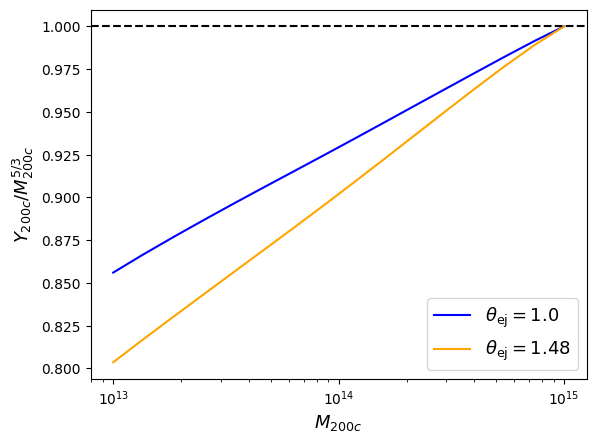

In [26]:
# Y200c_theta_ej.shape
pl.figure()
pl.plot(BCMP_test.M_array, Y200c_theta_ej[0,8,0,:]/((Y200c_theta_ej[0,8,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='b', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[0], 2)))
pl.plot(BCMP_test.M_array, Y200c_theta_ej[3,8,0,:]/((Y200c_theta_ej[3,8,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[3], 2)))
# pl.plot(BCMP_test.M_array, Y200_test_all[5,15,0,:]/((Y200_test_all[5,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[5], 2)))
# pl.plot(BCMP_test.M_array, Y200_test_all[9,15,0,:]/((Y200_test_all[9,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='r', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[9], 2)))
# pl.plot(BCMP_test.M200c_array, ), ls='--')
pl.xscale('log')
pl.xlabel(r'$M_{200c}$', size=13)
pl.ylabel(r'$Y_{200c}/M_{200c}^{5/3}$', size=13)
pl.axhline(1.0, color='k', ls='--')
# pl.yscale('log')
# pl.ylim(0.5,1.2)
pl.legend(fontsize=13, loc='lower right')



In [27]:
# pl.figure()
# pl.plot(BCMP_test.M_array, Y200_test_all[0,15,0,:]/((Y200_test_all[0,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='b', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[0], 2)))
# pl.plot(BCMP_test.M_array, Y200_test_all[3,15,0,:]/((Y200_test_all[3,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[3], 2)))
# # pl.plot(BCMP_test.M_array, Y200_test_all[5,15,0,:]/((Y200_test_all[5,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[5], 2)))
# # pl.plot(BCMP_test.M_array, Y200_test_all[9,15,0,:]/((Y200_test_all[9,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='r', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[9], 2)))
# # pl.plot(BCMP_test.M200c_array, ), ls='--')
# pl.xscale('log')
# pl.xlabel(r'$M_{200c}$', size=13)
# pl.ylabel(r'$Y_{200c}/M_{200c}^{5/3}$', size=13)
# pl.axhline(1.0, color='k', ls='--')
# # pl.yscale('log')
# # pl.ylim(0.5,1.2)
# pl.legend(fontsize=13, loc='lower right')






In [28]:
# pl.figure()
# pl.plot(BCMP_test.r_array, rho_g_test_all[0,:,15,0,0], color='b', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[0], 2)))
# pl.plot(BCMP_test.r_array, rho_g_test_all[3,:,15,0,0], color='r', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[3], 2)))
# # pl.plot(BCMP_test.r_array, Y200_test_all[3,15,0,:]/((Y200_test_all[3,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[3], 2)))
# # pl.plot(BCMP_test.M_array, Y200_test_all[5,15,0,:]/((Y200_test_all[5,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[5], 2)))
# # pl.plot(BCMP_test.M_array, Y200_test_all[9,15,0,:]/((Y200_test_all[9,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='r', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[9], 2)))
# # pl.plot(BCMP_test.M200c_array, ), ls='--')
# pl.xscale('log')
# pl.yscale('log')
# pl.xlabel(r'$M_{200c}$', size=13)
# pl.ylabel(r'$Y_{200c}/M_{200c}^{5/3}$', size=13)
# # pl.axhline(1.0, color='k', ls='--')
# # pl.yscale('log')
# # pl.ylim(0.5,1.2)
# pl.legend(fontsize=13, loc='lower right')






In [29]:
# Mind = 0
# pl.figure()
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[Mind,0], Pth_test_all[0,:,15,0,Mind], color='b', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[0], 2)))
# pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[Mind,0], Pth_test_all[3,:,15,0,Mind], color='r', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[3], 2)))
# # pl.plot(BCMP_test.r_array, Y200_test_all[3,15,0,:]/((Y200_test_all[3,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[3], 2)))
# # pl.plot(BCMP_test.M_array, Y200_test_all[5,15,0,:]/((Y200_test_all[5,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='orange', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[5], 2)))
# # pl.plot(BCMP_test.M_array, Y200_test_all[9,15,0,:]/((Y200_test_all[9,15,0,-1])*(BCMP_test.M_array/BCMP_test.M_array[-1])**(5/3)), color='r', label=r'$\theta_{\rm ej} = $' + str(np.round(theta_ej_array[9], 2)))
# # pl.plot(BCMP_test.M200c_array, ), ls='--')
# pl.xscale('log')
# pl.yscale('log')
# pl.xlim(3e-2, 1)
# pl.xlabel(r'$M_{200c}$', size=13)
# pl.ylabel(r'$Y_{200c}/M_{200c}^{5/3}$', size=13)
# # pl.axhline(1.0, color='k', ls='--')
# # pl.yscale('log')
# # pl.ylim(0.5,1.2)
# pl.ylim(1e-5, 1e-1)
# pl.legend(fontsize=13, loc='lower right')




/tmp/ipykernel_170264/2525561178.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 32/32 [00:00<00:00, 39.03it/s]
/tmp/ipykernel_170264/2525561178.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


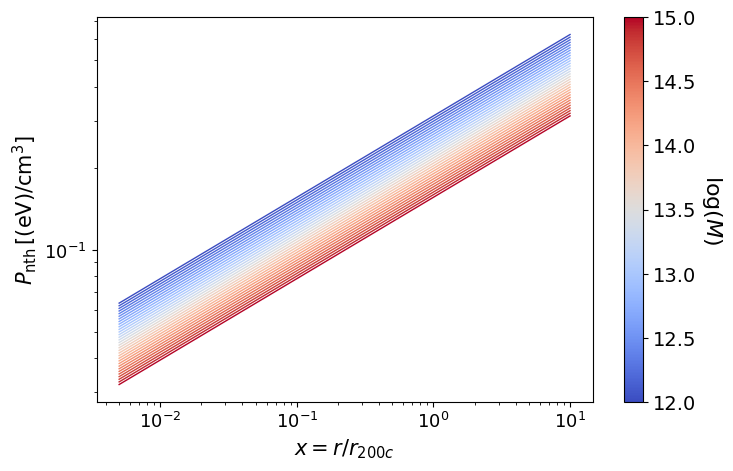

In [48]:
# plot the lines for different halo masses with a color map for each mass
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# R500c
from tqdm import tqdm
pl.figure(figsize=(8,5))
Mc0_arr = np.log10(BCMP_test.M200c_array)

# create a color map
cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(Mc0_arr).min(), vmax=(Mc0_arr).max())

for jM in tqdm(range(len(Mc0_arr))):
    color = cmap(norm((Mc0_arr[jM])))
    # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[jM,0], BCMP_test.Pth_mat[:,4,0,jM], color=color, alpha=1.0,lw=1.0)
    pl.plot(BCMP_test.r_array, BCMP_test.Pnt_fac[:,5,0,jM], color=color, alpha=1.0,lw=1.0)
    
    
# rho3 = Battaglia_12_16(M200c, zv, cosmo)
# pl.plot(r_array/r200c, ((r_array/r200c)**2)*rho_gas_KS, label = 'KS01', ls='--', color='k',lw=2.0)
# pl.plot(r_array/r200c, rho3.fb * ((r_array/r200c)**2)*rho_gas_B16, label = 'B16', ls=':', color='k',lw=2.0)

pl.xscale('log')
pl.yscale('log')
pl.tick_params(axis='both', which='major', labelsize=13)
pl.xlabel(r'$x = r/r_{200c}$', fontsize=15)
# pl.ylabel(r'$x^2 \rho_{gas}$', fontsize=15)
pl.ylabel(r'$P_{\rm nth} \, [({\rm eV})/{\rm cm}^3]$', fontsize=15)
# pl.title(r'$\theta_{\rm ej} = $' + str(theta_ej) + ',' + r'$M = $' + str(np.round(np.log10(M200c), 2)), fontsize=15)
# pl.legend(fontsize=14)

# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\log(M)$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)






In [49]:
import numpy as np
# np.log10((10** 11.91) *0.6737)
np.log10((10** 13.42) *0.6737)




13.248466547352677

/tmp/ipykernel_69215/2095292645.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 32/32 [00:01<00:00, 30.17it/s]
/tmp/ipykernel_69215/2095292645.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


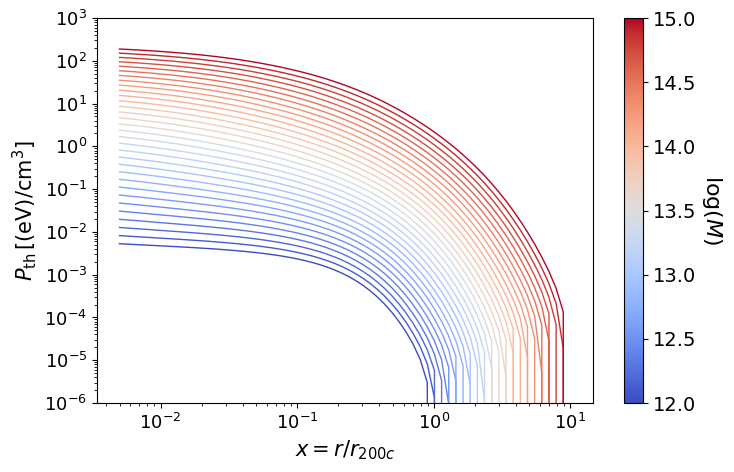

In [42]:
# plot the lines for different halo masses with a color map for each mass
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# R500c
from tqdm import tqdm
pl.figure(figsize=(8,5))
Mc0_arr = np.log10(BCMP_test.M200c_array)

# create a color map
cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(Mc0_arr).min(), vmax=(Mc0_arr).max())

for jM in tqdm(range(len(Mc0_arr))):
    color = cmap(norm((Mc0_arr[jM])))
    # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[jM,0], BCMP_test.Pth_mat[:,4,0,jM], color=color, alpha=1.0,lw=1.0)
    pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,5,0,jM], color=color, alpha=1.0,lw=1.0)
    
    
# rho3 = Battaglia_12_16(M200c, zv, cosmo)
# pl.plot(r_array/r200c, ((r_array/r200c)**2)*rho_gas_KS, label = 'KS01', ls='--', color='k',lw=2.0)
# pl.plot(r_array/r200c, rho3.fb * ((r_array/r200c)**2)*rho_gas_B16, label = 'B16', ls=':', color='k',lw=2.0)

pl.xscale('log')
pl.yscale('log')
pl.tick_params(axis='both', which='major', labelsize=13)
pl.xlabel(r'$x = r/r_{200c}$', fontsize=15)
# pl.ylabel(r'$x^2 \rho_{gas}$', fontsize=15)
pl.ylabel(r'$P_{\rm th} \, [({\rm eV})/{\rm cm}^3]$', fontsize=15)
# pl.title(r'$\theta_{\rm ej} = $' + str(theta_ej) + ',' + r'$M = $' + str(np.round(np.log10(M200c), 2)), fontsize=15)
# pl.legend(fontsize=14)
pl.ylim(1e-6, 1e3)
# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\log(M)$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)






/tmp/ipykernel_170264/1239587756.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 32/32 [00:00<00:00, 129.36it/s]
/tmp/ipykernel_170264/1239587756.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


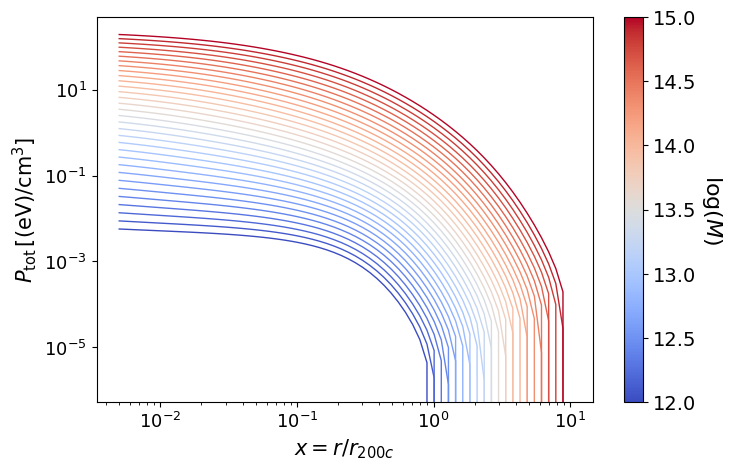

In [51]:
# plot the lines for different halo masses with a color map for each mass
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# R500c
from tqdm import tqdm
pl.figure(figsize=(8,5))
Mc0_arr = np.log10(BCMP_test.M200c_array)

# create a color map
cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(Mc0_arr).min(), vmax=(Mc0_arr).max())

for jM in tqdm(range(len(Mc0_arr))):
    color = cmap(norm((Mc0_arr[jM])))
    # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[jM,0], BCMP_test.Pth_mat[:,4,0,jM], color=color, alpha=1.0,lw=1.0)
    pl.plot(BCMP_test.r_array, BCMP_test.Ptot_mat[:,5,0,jM], color=color, alpha=1.0,lw=1.0)
    
    
# rho3 = Battaglia_12_16(M200c, zv, cosmo)
# pl.plot(r_array/r200c, ((r_array/r200c)**2)*rho_gas_KS, label = 'KS01', ls='--', color='k',lw=2.0)
# pl.plot(r_array/r200c, rho3.fb * ((r_array/r200c)**2)*rho_gas_B16, label = 'B16', ls=':', color='k',lw=2.0)

pl.xscale('log')
pl.yscale('log')
pl.tick_params(axis='both', which='major', labelsize=13)
pl.xlabel(r'$x = r/r_{200c}$', fontsize=15)
# pl.ylabel(r'$x^2 \rho_{gas}$', fontsize=15)
pl.ylabel(r'$P_{\rm tot} \, [({\rm eV})/{\rm cm}^3]$', fontsize=15)
# pl.title(r'$\theta_{\rm ej} = $' + str(theta_ej) + ',' + r'$M = $' + str(np.round(np.log10(M200c), 2)), fontsize=15)
# pl.legend(fontsize=14)

# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\log(M)$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)






In [52]:
from get_B12_profile import Battaglia_12_16

M200_arr = np.log10(BCMP_test.M200c_array)
Pth_mat_B12 = np.zeros((len(M200_arr), len(BCMP_test.r_array)))
for jM in tqdm(range(len(M200_arr))):
    B12_obj_jM = Battaglia_12_16(10**M200_arr[jM], 0.0, cosmo=cosmo)
    Pth_B12_jM = B12_obj_jM.get_Pth(BCMP_test.r_array)
    Pth_mat_B12[jM, :] = Pth_B12_jM
    
    


100%|██████████| 32/32 [00:00<00:00, 61.92it/s]


/tmp/ipykernel_1391296/3246506153.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 32/32 [00:00<00:00, 288.67it/s]
/tmp/ipykernel_1391296/3246506153.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


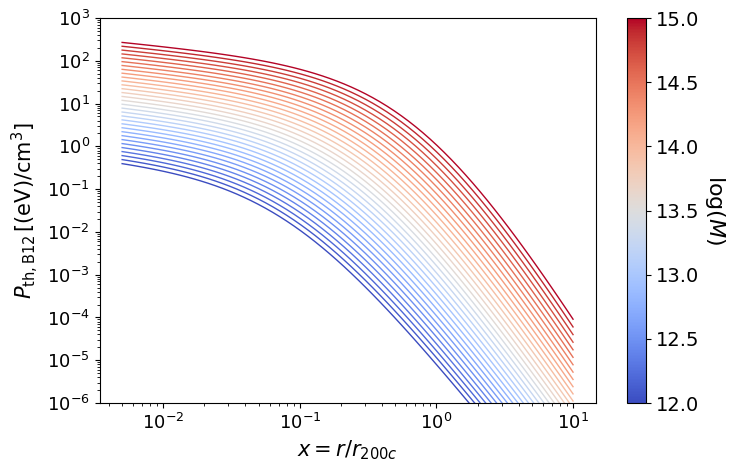

In [33]:
# plot the lines for different halo masses with a color map for each mass
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# R500c
from tqdm import tqdm
pl.figure(figsize=(8,5))
Mc0_arr = np.log10(BCMP_test.M200c_array)

# create a color map
cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(Mc0_arr).min(), vmax=(Mc0_arr).max())

for jM in tqdm(range(len(Mc0_arr))):
    color = cmap(norm((Mc0_arr[jM])))
    # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[jM,0], BCMP_test.Pth_mat[:,4,0,jM], color=color, alpha=1.0,lw=1.0)
    pl.plot(BCMP_test.r_array, Pth_mat_B12[jM,:], color=color, alpha=1.0,lw=1.0)
    
    
# rho3 = Battaglia_12_16(M200c, zv, cosmo)
# pl.plot(r_array/r200c, ((r_array/r200c)**2)*rho_gas_KS, label = 'KS01', ls='--', color='k',lw=2.0)
# pl.plot(r_array/r200c, rho3.fb * ((r_array/r200c)**2)*rho_gas_B16, label = 'B16', ls=':', color='k',lw=2.0)

pl.xscale('log')
pl.yscale('log')
pl.tick_params(axis='both', which='major', labelsize=13)
pl.xlabel(r'$x = r/r_{200c}$', fontsize=15)
# pl.ylabel(r'$x^2 \rho_{gas}$', fontsize=15)
pl.ylabel(r'$P_{\rm th, B12} \, [({\rm eV})/{\rm cm}^3]$', fontsize=15)
# pl.title(r'$\theta_{\rm ej} = $' + str(theta_ej) + ',' + r'$M = $' + str(np.round(np.log10(M200c), 2)), fontsize=15)
# pl.legend(fontsize=14)
pl.ylim(1e-6,1e3)
# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\log(M)$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)






/tmp/ipykernel_1350471/3684892926.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 32/32 [00:00<00:00, 129.22it/s]
/tmp/ipykernel_1350471/3684892926.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


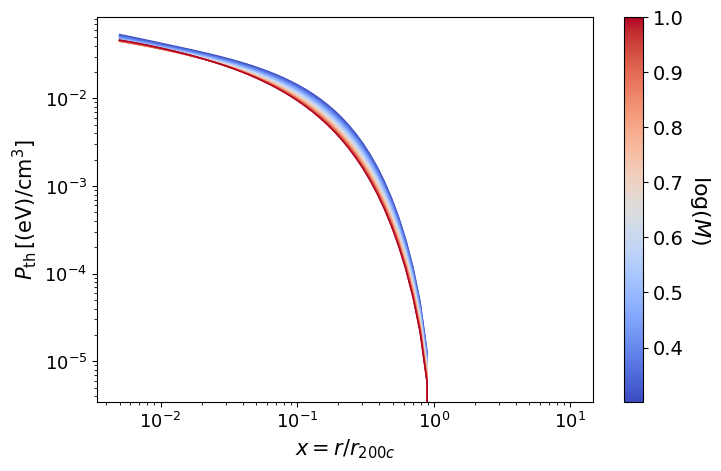

In [21]:
# plot the lines for different halo masses with a color map for each mass
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# R500c
from tqdm import tqdm
pl.figure(figsize=(8,5))
Mc0_arr = np.log10(BCMP_test.conc_array)

# create a color map
cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(Mc0_arr).min(), vmax=(Mc0_arr).max())

for jM in tqdm(range(len(Mc0_arr))):
    color = cmap(norm((Mc0_arr[jM])))
    # pl.plot(BCMP_test.r_array/BCMP_test.r200c_mat[jM,0], BCMP_test.Pth_mat[:,4,0,jM], color=color, alpha=1.0,lw=1.0)
    pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,jM,0,5], color=color, alpha=1.0,lw=1.0)
    
    
# rho3 = Battaglia_12_16(M200c, zv, cosmo)
# pl.plot(r_array/r200c, ((r_array/r200c)**2)*rho_gas_KS, label = 'KS01', ls='--', color='k',lw=2.0)
# pl.plot(r_array/r200c, rho3.fb * ((r_array/r200c)**2)*rho_gas_B16, label = 'B16', ls=':', color='k',lw=2.0)

pl.xscale('log')
pl.yscale('log')
pl.tick_params(axis='both', which='major', labelsize=13)
pl.xlabel(r'$x = r/r_{200c}$', fontsize=15)
# pl.ylabel(r'$x^2 \rho_{gas}$', fontsize=15)
pl.ylabel(r'$P_{\rm th} \, [({\rm eV})/{\rm cm}^3]$', fontsize=15)
# pl.title(r'$\theta_{\rm ej} = $' + str(theta_ej) + ',' + r'$M = $' + str(np.round(np.log10(M200c), 2)), fontsize=15)
# pl.legend(fontsize=14)

# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\log(M)$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)






Text(0, 0.5, '$P_{\\rm th} \\, [({\\rm eV})/{\\rm cm}^3]$')

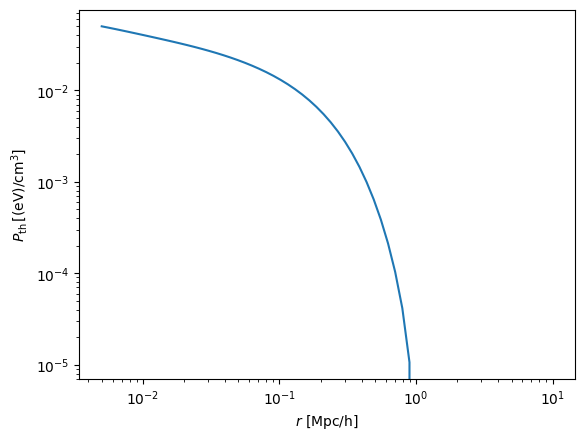

In [16]:
# plot the lines for different halo masses with a color map for each mass

pl.figure()
for ji in range(10):
    pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,4,0,5])
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$r$ [Mpc/h]')
pl.ylabel(r'$P_{\rm th} \, [({\rm eV})/{\rm cm}^3]$')


In [30]:
from setup_power_spectra_jit import setup_power_BCMP

setup_power_BCMP_test = setup_power_BCMP(sim_params_dict, halo_params_dict, analysis_dict, num_points_trapz_int=64)

Pk_nfw = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0]
Pk_dmb = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0]
Pk_sup = (Pk_dmb)/Pk_nfw



In [31]:
# Pk_sup


Array([0.98622459, 0.98824462, 0.98996436, 0.99142077, 0.99264792,
       0.99367671, 0.99453477, 0.99524648, 0.99583307, 0.99631267,
       0.99670042, 0.99700848, 0.99724593, 0.99741832, 0.99752691,
       0.99756701, 0.99752554, 0.99737847, 0.99709172, 0.99663368,
       0.9960049 , 0.99527309, 0.99456221, 0.99382814, 0.99240659,
       0.9894301 , 0.98661774, 0.98334885, 0.97661552, 0.97038442,
       0.96071097, 0.94831789, 0.93407237, 0.9180164 , 0.90136475,
       0.88409335, 0.86721766, 0.85087338, 0.83453211, 0.81714648,
       0.79741104, 0.77429995, 0.74819928, 0.72261825, 0.7047188 ,
       0.69959091, 0.69864554, 0.69108315, 0.69124731, 0.70116224,
       0.7089705 , 0.72864557, 0.75449195, 0.78836732, 0.83564003,
       0.89998358, 0.98651129, 1.10244145, 1.25734134, 1.46347484,
       1.73589048, 2.09181951, 2.54871459, 3.12009214], dtype=float64)

In [ ]:
from setup_power_spectra_jit import setup_power_BCMP
from tqdm import tqdm
import copy
sims_params_dict_vary = copy.deepcopy(sim_params_dict)
theta_ej_array = np.linspace(1.0, 6.0, 10)
Pk_sup_all = np.zeros((len(theta_ej_array), len(Pk_sup)))
for jt in tqdm(range(len(theta_ej_array))):
    sims_params_dict_vary['theta_ej'] = theta_ej_array[jt]
    setup_power_BCMP_test = setup_power_BCMP(sims_params_dict_vary, halo_params_dict, analysis_dict, num_points_trapz_int=64)
    Pk_nfw = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0]
    Pk_dmb = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0]
    Pk_sup = (Pk_dmb)/Pk_nfw
    Pk_sup_all[jt,:] = Pk_sup



100%|██████████| 10/10 [02:36<00:00, 15.61s/it]


In [41]:
# from setup_power_spectra_jit import setup_power_BCMP
# from tqdm import tqdm
# import copy
# # log10_Mc0
# # mu_beta
# # halo_params_dict = {}
# halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 1e-3, 5, 63
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 12.0, 15.0, 64
# halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 1, 10, 64
# halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 64
# halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.05
# halo_params_dict['mdef'] = '200c'
# halo_params_dict['hmf_model'] = 'T08'
# halo_params_dict['conc_model'] = 'Duffy08'
# halo_params_dict['do_corr_2h_mm'] = True
# sims_params_dict_vary = copy.deepcopy(sim_params_dict)
# theta_ej_array = np.array([2,4,8])
# log10_Mc_array = np.array([15.0413,13.3617,12.908])
# mu_beta_array = np.array([0.17,0.31,0.59])
# Pk_sup_all = np.zeros((len(theta_ej_array), len(Pk_sup)))
# for jt in tqdm(range(len(theta_ej_array))):
#     sims_params_dict_vary['theta_ej'] = theta_ej_array[jt]
#     sims_params_dict_vary['log10_Mc0'] = log10_Mc_array[jt]
#     sims_params_dict_vary['mu_beta'] = mu_beta_array[jt]        
#     setup_power_BCMP_test = setup_power_BCMP(sims_params_dict_vary, halo_params_dict, analysis_dict, num_points_trapz_int=64)
#     Pk_nfw = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0]
#     Pk_dmb = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0]
#     Pk_sup = (Pk_dmb)/Pk_nfw
#     Pk_sup_all[jt,:] = Pk_sup



100%|██████████| 3/3 [00:47<00:00, 15.91s/it]


(0.1, 11)

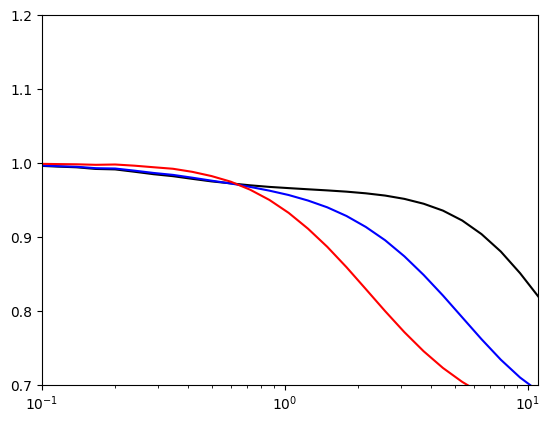

In [42]:
pl.figure()
pl.plot(setup_power_BCMP_test.kPk_array, Pk_sup_all[0,:], label=r'$\theta_{\rm ej} = 2$', color='k')
pl.plot(setup_power_BCMP_test.kPk_array, Pk_sup_all[1,:], label=r'$\theta_{\rm ej} = 4$', color='b')
pl.plot(setup_power_BCMP_test.kPk_array, Pk_sup_all[2,:], label=r'$\theta_{\rm ej} = 8$', color='r')
pl.xscale('log')
pl.ylim(0.7,1.2)
pl.xlim(0.1, 11)


In [13]:
from setup_power_spectra_jit import setup_power_BCMP
from tqdm import tqdm
import copy
sims_params_dict_vary = copy.deepcopy(sim_params_dict)
theta_ej_array = np.linspace(1.0, 6.0, 10)
Pk_sup_all = np.zeros((len(theta_ej_array), len(Pk_sup)))
for jt in tqdm(range(len(theta_ej_array))):
    sims_params_dict_vary['theta_ej'] = theta_ej_array[jt]
    BCMP_test = BCM_18_wP(sim_params_dict, halo_params_dict)
    



  0%|          | 0/10 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [109]:
# from get_corr_func import get_corrfunc_BCMP
import copy
from tqdm import tqdm
from get_corr_func_jit import get_corrfunc_BCMP
sims_params_dict_vary = copy.deepcopy(sim_params_dict)
theta_ej_array = np.linspace(1.0, 6.0, 30)
analysis_dict_vary = copy.deepcopy(analysis_dict)
fac_th = 3
gty_out_all = np.zeros((len(theta_ej_array), fac_th * len(theta_data)))
xip_out_all = np.zeros((len(theta_ej_array), fac_th * len(theta_data)))
xim_out_all = np.zeros((len(theta_ej_array), fac_th * len(theta_data)))
for jt in tqdm(range(len(theta_ej_array))):
    sims_params_dict_vary['theta_ej_0'] = theta_ej_array[jt]
    analysis_dict_vary['angles_data_array'] = jnp.logspace(np.log10(0.5), np.log10(100), fac_th * len(theta_data))
    get_corrfunc_BCMP_test = get_corrfunc_BCMP(sims_params_dict_vary, halo_params_dict, analysis_dict_vary, verbose_time=False)
    gty_out_all[jt,:] = get_corrfunc_BCMP_test.gty_out_mat[:,3]
    xip_out_all[jt,:] = get_corrfunc_BCMP_test.xip_out_mat[:,3,3]
    xim_out_all[jt,:] = get_corrfunc_BCMP_test.xim_out_mat[:,3,3]
    





  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [08:50<00:00, 17.69s/it]


In [110]:
C = jnp.array(df_data['COVMAT'].data[400:,400:])
data_vec = jnp.array(df_data['compton_shear'].data['VALUE'])
gty_data_to_plot = data_vec[60:]
gty_sig_to_plot = jnp.sqrt(jnp.diag(C))[60:]

C = jnp.array(df_data['COVMAT'].data[:200,:200])
data_vec = jnp.array(df_data['xip'].data['VALUE'])
bin1, bin2 = df_data['xip'].data['BIN1'], df_data['xip'].data['BIN2']
indsel = np.where((bin1==4) & (bin2==4))[0]
xip_data_to_plot = data_vec[indsel]
xip_sig_to_plot = jnp.sqrt(jnp.diag(C))[indsel]

C = jnp.array(df_data['COVMAT'].data[200:400,200:400])
data_vec = jnp.array(df_data['xim'].data['VALUE'])
bin1, bin2 = df_data['xim'].data['BIN1'], df_data['xim'].data['BIN2']
indsel = np.where((bin1==4) & (bin2==4))[0]
xim_data_to_plot = data_vec[indsel]
xim_sig_to_plot = jnp.sqrt(jnp.diag(C))[indsel]




In [111]:
# !module load texlive
# !module load texstudio


/tmp/ipykernel_833941/2961910466.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 476.60it/s]


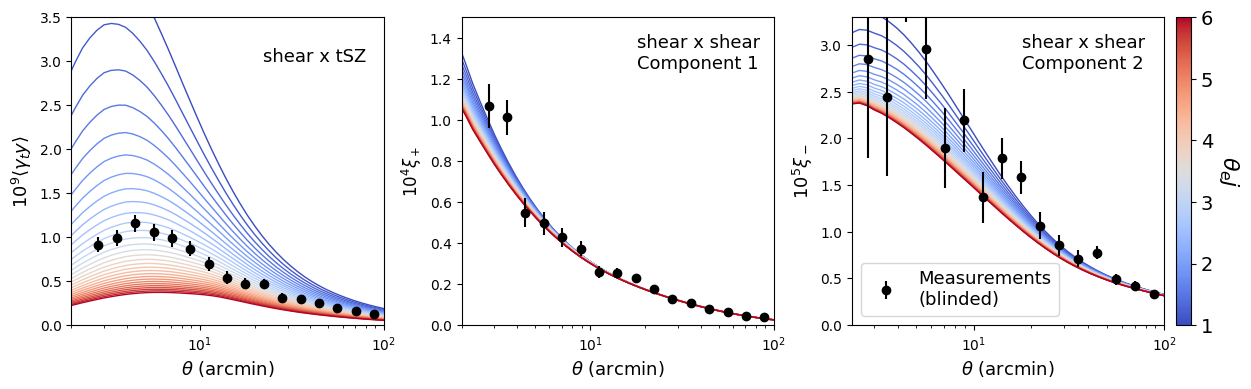

In [122]:
pl.rc('text', usetex=False)
# make a three panel plot, plotting all the theta_ej curves for for gty_out_thetaej[:,3,:], xip_out_thetaej[:,3,3,:], xim_out_thetaej[:,3,3,:]
# draw theta_ej curves from a colormap
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_ej_array).min(), vmax=(theta_ej_array).max())
analysis_dict_vary['angles_data_array'] = jnp.logspace(np.log10(0.5), np.log10(100), fac_th * len(theta_data))

pl.figure(figsize=(15,4))
# increase the distance between subplots:
pl.subplots_adjust(wspace=0.25)
pl.subplot(131)
for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    pl.plot(analysis_dict_vary['angles_data_array'], 1e9*gty_out_all[jM,:], color=color, alpha=1.0,lw=1.0)
# pl.legend()
pl.errorbar(analysis_dict['angles_data_array'], 1e9*gty_data_to_plot, yerr=1e9*gty_sig_to_plot, fmt='o', color='k',label='data')
pl.text(22, 3.0, r'shear x tSZ', fontsize=13)
pl.xscale('log')
pl.xlim(2.0,100)
pl.ylim(0.0,3.5)
pl.ylabel(r'$10^9 \langle \gamma_t y \rangle$', fontsize=13)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=13)
# pl.title('1-halo term')
pl.subplot(132)
for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    pl.plot(analysis_dict_vary['angles_data_array'], 1e4*xip_out_all[jM,:], color=color, alpha=1.0,lw=1.0)
pl.errorbar(analysis_dict['angles_data_array'], 1e4*xip_data_to_plot, yerr=1e4*xip_sig_to_plot, fmt='o', color='k',label='data')
# pl.legend()
pl.text(18, 1.25, r'shear x shear' + '\n' + 'Component 1', fontsize=13)
pl.xscale('log')
# pl.yscale('log')
pl.xlim(2.0,100)
pl.ylim(0.0,1.5)
pl.ylabel(r'$10^4 \xi_+$', fontsize=12)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=13)
# pl.title('2-halo term')
pl.subplot(133)
for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    pl.plot(analysis_dict_vary['angles_data_array'], 1e5*xim_out_all[jM,:], color=color, alpha=1.0,lw=1.0)
pl.errorbar(analysis_dict['angles_data_array'], 1e5*xim_data_to_plot, yerr=1e5*xim_sig_to_plot, fmt='o', color='k', label='Measurements' + '\n' + '(blinded)')
pl.legend(loc='lower left', fontsize=13)
# pl.legend()
pl.xscale('log')
pl.text(18, 2.75, r'shear x shear' + '\n' +'Component 2', fontsize=13)
# pl.yscale('log')
pl.xlim(2.3,100)
pl.ylim(0.0,3.3)
pl.ylabel(r'$10^5 \xi_-$', fontsize=13)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=13)
# pl.title('2-halo term')

# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm, ax=pl.gcf().get_axes(), orientation='vertical', fraction=0.05, pad=0.01)
cbar.set_label(r'$\theta_ej$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)
pl.savefig('gty_xip_xim_thetaej.pdf', bbox_inches='tight')






/tmp/ipykernel_2151077/3754415768.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 10/10 [00:00<00:00, 226.80it/s]
/tmp/ipykernel_2151077/3754415768.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


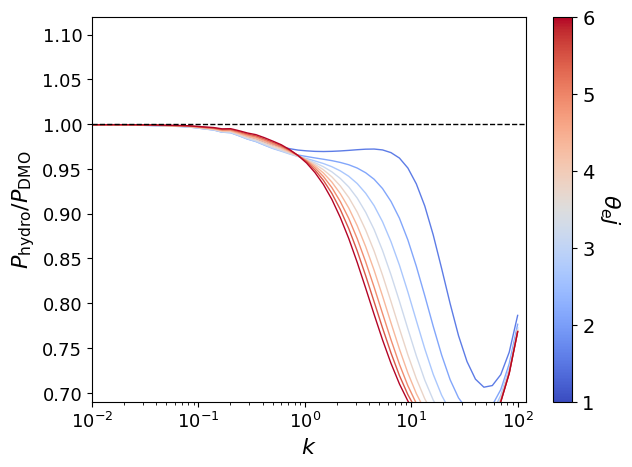

In [35]:
# plot the lines for different halo masses with a color map for each mass
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# R500c
from tqdm import tqdm
pl.figure(figsize=(7,5))
# Mc0_arr = np.log10(BCMP_test.conc_array)

# create a color map
cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_ej_array).min(), vmax=(theta_ej_array).max())

for jM in tqdm(range(len(theta_ej_array))):
    if jM > 0:
        color = cmap(norm((theta_ej_array[jM])))
        pl.plot(setup_power_BCMP_test.kPk_array, Pk_sup_all[jM,:], color=color, alpha=1.0,lw=1.0)
pl.axhline(y=1.0, color='k', ls='--', lw=1.0)
pl.xscale('log')
# pl.yscale('log')
pl.tick_params(axis='both', which='major', labelsize=13)
pl.xlim(1e-2, 120)
pl.xlabel(r'$k$', fontsize=16)
pl.ylabel(r'$P_{\rm hydro}/P_{\rm DMO}$', fontsize=16)
pl.ylim(0.69,1.12)

# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\theta_ej$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)






In [9]:
from setup_power_spectra_jit import setup_power_BCMP
from tqdm import tqdm
import copy
sims_params_dict_vary = copy.deepcopy(sim_params_dict)
theta_co_array = np.linspace(0.01, 0.5, 15)
Pk_sup_all_thetaco = np.zeros((len(theta_co_array), len(Pk_sup)))
for jt in tqdm(range(len(theta_co_array))):
    sims_params_dict_vary['theta_co'] = theta_co_array[jt]
    setup_power_BCMP_test = setup_power_BCMP(sims_params_dict_vary, halo_params_dict, num_points_trapz_int=64)
    Pk_nfw = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0]
    Pk_dmb = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0]
    Pk_sup = (Pk_dmb)/Pk_nfw
    Pk_sup_all_thetaco[jt,:] = Pk_sup




100%|██████████| 15/15 [04:37<00:00, 18.48s/it]


/tmp/ipykernel_1349993/1974414609.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 15/15 [00:00<00:00, 55.10it/s]
/tmp/ipykernel_1349993/1974414609.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


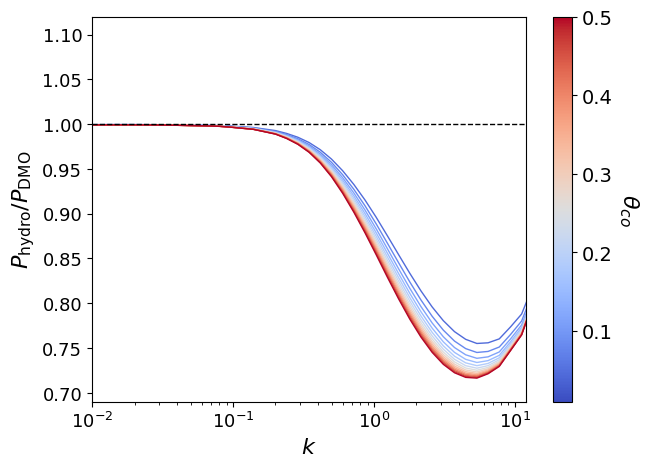

In [12]:
# plot the lines for different halo masses with a color map for each mass
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# R500c
from tqdm import tqdm
pl.figure(figsize=(7,5))
# Mc0_arr = np.log10(BCMP_test.conc_array)

# create a color map
cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_co_array).min(), vmax=(theta_co_array).max())

for jM in tqdm(range(len(theta_co_array))):
    if jM > 0:
        color = cmap(norm((theta_co_array[jM])))
        pl.plot(setup_power_BCMP_test.kPk_array, Pk_sup_all_thetaco[jM,:], color=color, alpha=1.0,lw=1.0)
pl.axhline(y=1.0, color='k', ls='--', lw=1.0)
pl.xscale('log')
# pl.yscale('log')
pl.tick_params(axis='both', which='major', labelsize=13)
pl.xlim(1e-2, 12)
pl.xlabel(r'$k$', fontsize=16)
pl.ylabel(r'$P_{\rm hydro}/P_{\rm DMO}$', fontsize=16)
pl.ylim(0.69,1.12)

# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\theta_{co}$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)








In [14]:
# from get_corr_func import get_corrfunc_BCMP
import copy
from tqdm import tqdm
from get_corr_func_jit import get_corrfunc_BCMP
sims_params_dict_vary = copy.deepcopy(sim_params_dict)
analysis_dict_vary = copy.deepcopy(analysis_dict)
gty_out_all_thetaco = np.zeros((len(theta_co_array), len(theta_data)))
xip_out_all_thetaco = np.zeros((len(theta_co_array), len(theta_data)))
xim_out_all_thetaco = np.zeros((len(theta_co_array), len(theta_data)))
for jt in tqdm(range(len(theta_co_array))):
    sims_params_dict_vary['theta_co'] = theta_co_array[jt]
    analysis_dict_vary['angles_data_array'] = jnp.logspace(np.log10(0.5), np.log10(100), len(theta_data))
    get_corrfunc_BCMP_test = get_corrfunc_BCMP(sims_params_dict_vary, halo_params_dict, analysis_dict_vary, verbose_time=False)
    gty_out_all_thetaco[jt,:] = get_corrfunc_BCMP_test.gty_out_mat[:,3]
    xip_out_all_thetaco[jt,:] = get_corrfunc_BCMP_test.xip_out_mat[:,3,3]
    xim_out_all_thetaco[jt,:] = get_corrfunc_BCMP_test.xim_out_mat[:,3,3]
    





 93%|█████████▎| 14/15 [05:27<00:23, 23.33s/it]2023-08-16 15:33:23.686379: W external/tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.99GiB (rounded to 6426758144)requested by op 
2023-08-16 15:33:23.687406: W external/tsl/tsl/framework/bfc_allocator.cc:497] **********************************************************************************__________________
2023-08-16 15:33:23.687577: E external/xla/xla/pjrt/pjrt_stream_executor_client.cc:2461] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 6426757936 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:     1.2KiB
              constant allocation:   809.3KiB
        maybe_live_out allocation:   16.00MiB
     preallocated temp allocation:    5.99GiB
  preallocated temp fragmentation:         8B (0.00%)
                 total allocation:    6.00GiB
              total fragmentation:   16.30MiB (0.2

XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 6426757936 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:     1.2KiB
              constant allocation:   809.3KiB
        maybe_live_out allocation:   16.00MiB
     preallocated temp allocation:    5.99GiB
  preallocated temp fragmentation:         8B (0.00%)
                 total allocation:    6.00GiB
              total fragmentation:   16.30MiB (0.27%)
Peak buffers:
	Buffer 1:
		Size: 1.00GiB
		Operator: op_name="jit(get_zeta)/jit(main)/vmap(jit(get_Mgas))/vmap(jit(get_rho_gas_normed))/div" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=357
		XLA Label: fusion
		Shape: f64[1,32,32,64,32,64]
		==========================

	Buffer 2:
		Size: 1.00GiB
		Operator: op_name="jit(get_zeta)/jit(main)/vmap(jit(get_Mgas))/vmap(jit(get_rho_gas_normed))/div" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=357
		XLA Label: fusion
		Shape: f64[1,32,32,64,32,64]
		==========================

	Buffer 3:
		Size: 1.00GiB
		Operator: op_name="jit(get_zeta)/jit(main)/vmap(jit(get_Mcga))/mul" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=182
		XLA Label: fusion
		Shape: f64[32,32,64,32,64]
		==========================

	Buffer 4:
		Size: 1.00GiB
		Operator: op_name="jit(get_zeta)/jit(main)/vmap(jit(get_Mcga))/mul" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=182
		XLA Label: fusion
		Shape: f64[32,32,64,32,64]
		==========================

	Buffer 5:
		Size: 1008.00MiB
		Operator: op_name="jit(get_zeta)/jit(main)/vmap(jit(get_Mcga))/jit(trapz)/jit(diff)/sub" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=183
		XLA Label: fusion
		Shape: f64[32,32,64,32,63]
		==========================

	Buffer 6:
		Size: 512.00MiB
		Operator: op_name="jit(get_zeta)/jit(main)/vmap(jit(get_Mcga))/jit(trapz)/reduce_sum[axes=(5,)]" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=183
		XLA Label: fusion
		Shape: f64[32,32,32,64,32]
		==========================

	Buffer 7:
		Size: 512.00MiB
		Operator: op_name="jit(get_zeta)/jit(main)/vmap(jit(get_Mcga))/jit(trapz)/reduce_sum[axes=(5,)]" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=183
		XLA Label: fusion
		Shape: f64[32,32,32,64,32]
		==========================

	Buffer 8:
		Size: 16.00MiB
		Operator: op_name="jit(get_zeta)/jit(main)/jit(_interp)/jit(_where)/select_n" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=400
		XLA Label: fusion
		Shape: f64[32,32,32,64]
		==========================

	Buffer 9:
		Size: 256.0KiB
		Operator: op_name="jit(get_zeta)/jit(main)/jit(get_Mnfw)/vmap(jit(get_rho_nfw_normed))/div" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=250
		XLA Label: fusion
		Shape: f64[32768,1,1,1]
		==========================

	Buffer 10:
		Size: 256.0KiB
		Operator: op_name="jit(get_zeta)/jit(main)/jit(get_Mnfw)/vmap(jit(get_rho_nfw_normed))/div" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=250
		XLA Label: fusion
		Shape: f64[32768,1,1,1]
		==========================

	Buffer 11:
		Size: 256.0KiB
		Operator: op_name="jit(get_zeta)/jit(main)/jit(get_Mnfw)/vmap(jit(get_rho_nfw_normed))/div" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=250
		XLA Label: fusion
		Shape: f64[32768,1,1,1]
		==========================

	Buffer 12:
		Size: 256.0KiB
		Operator: op_name="jit(get_zeta)/jit(main)/jit(get_Mnfw)/vmap(jit(get_rho_nfw_normed))/div" source_file="/mnt/ceph/users/spandey/GODMAX/src/get_BCMP_profile_jit.py" source_line=250
		XLA Label: fusion
		Shape: f64[32,32,32]
		==========================

	Buffer 13:
		Size: 256.0KiB
		XLA Label: constant
		Shape: f64[32,32,32]
		==========================

	Buffer 14:
		Size: 256.0KiB
		XLA Label: constant
		Shape: f64[32,32,32]
		==========================

	Buffer 15:
		Size: 256.0KiB
		XLA Label: constant
		Shape: f64[32,32,32]
		==========================



/tmp/ipykernel_1349993/1827260415.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
100%|██████████| 15/15 [00:00<00:00, 370.21it/s]
/tmp/ipykernel_1349993/1827260415.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


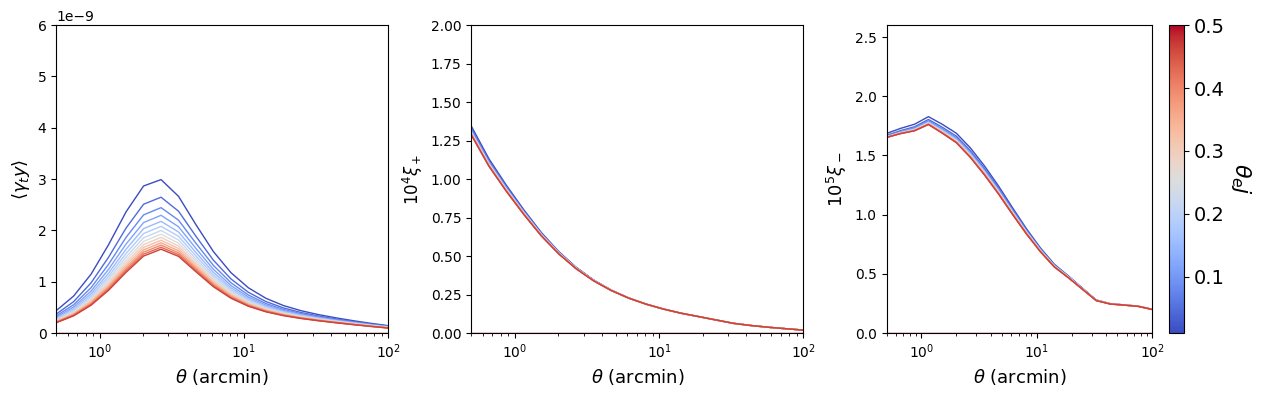

In [16]:
# make a three panel plot, plotting all the theta_ej curves for for gty_out_thetaej[:,3,:], xip_out_thetaej[:,3,3,:], xim_out_thetaej[:,3,3,:]
# draw theta_ej curves from a colormap
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_co_array).min(), vmax=(theta_co_array).max())
analysis_dict_vary['angles_data_array'] = jnp.logspace(np.log10(0.5), np.log10(100), len(theta_data))

pl.figure(figsize=(15,4))
# increase the distance between subplots:
pl.subplots_adjust(wspace=0.25)
pl.subplot(131)
for jM in tqdm(range(len(theta_co_array))):
    color = cmap(norm((theta_co_array[jM])))
    pl.plot(analysis_dict_vary['angles_data_array'], gty_out_all_thetaco[jM,:], color=color, alpha=1.0,lw=1.0)
# pl.legend()
pl.xscale('log')
pl.xlim(0.5,100)
pl.ylim(0.0,0.6e-8)
pl.ylabel(r'$\langle \gamma_t y \rangle$', fontsize=13)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=13)
# pl.title('1-halo term')
pl.subplot(132)
for jM in tqdm(range(len(theta_co_array))):
    color = cmap(norm((theta_co_array[jM])))
    pl.plot(analysis_dict_vary['angles_data_array'], 1e4*xip_out_all_thetaco[jM,:], color=color, alpha=1.0,lw=1.0)

# pl.legend()
pl.xscale('log')
pl.xlim(0.5,100)
pl.ylim(0.0,2)
pl.ylabel(r'$10^4 \xi_+$', fontsize=12)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=13)
# pl.title('2-halo term')
pl.subplot(133)
for jM in tqdm(range(len(theta_co_array))):
    color = cmap(norm((theta_co_array[jM])))
    pl.plot(analysis_dict_vary['angles_data_array'], 1e5*xim_out_all_thetaco[jM,:], color=color, alpha=1.0,lw=1.0)

# pl.legend()
# pl.legend()
pl.xscale('log')
pl.xlim(0.5,100)
pl.ylim(0.0,2.6)
pl.ylabel(r'$10^5 \xi_-$', fontsize=13)
pl.xlabel(r'$\theta$ (arcmin)', fontsize=13)
# pl.title('2-halo term')

# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm)
cbar.set_label(r'$\theta_ej$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14)








In [37]:
from get_power_spectra_jit import get_power_BCMP

# get_power_BCMP_test = get_power_BCMP(sim_params_dict, halo_params_dict, setup_power_BCMP_test, num_points_trapz_int=64)
get_power_BCMP_obj_test = get_power_BCMP(sim_params_dict, halo_params_dict, analysis_dict,setup_power_BCMP_obj=setup_power_BCMP_test, verbose_time=True)



Time for setup_power_BCMP:  7.152557373046875e-07
Time for computing Wk_mat:  0.3037893772125244
Time for computing p_logc_Mz:  0.0033006668090820312
Time for computing Cl_kappa_y_1h_mat:  1.7703499794006348
Time for computing Cl_kappa_y_2h_mat:  0.10958313941955566
Time for computing Cl_kappa_kappa_1h_mat:  0.9578969478607178
Time for computing Cl_kappa_kappa_2h_mat:  0.11808991432189941
Time for computing Cl_kappa_kappa_nfw_1h_mat:  0.9075069427490234
Total time for computing all Cls:  4.203224182128906


In [38]:
# get_power_BCMP_obj_test.Cl_kappa_kappa_1h_mat.shape


In [39]:
# from get_corr_func import get_corrfunc_BCMP
from get_corr_func_jit import get_corrfunc_BCMP
get_corrfunc_BCMP_test = get_corrfunc_BCMP(sim_params_dict, halo_params_dict, analysis_dict, get_power_BCMP_obj=get_power_BCMP_obj_test, verbose_time=True)



Time for setup_power_BCMP:  1.430511474609375e-06
Time for gty Hankel transform:  0.24805188179016113
Time for xip Hankel transform:  0.24227261543273926
Time for xim Hankel transform:  0.23351120948791504


In [40]:
# get_corrfunc_BCMP_test.gty_1h_out_mat[:,3]


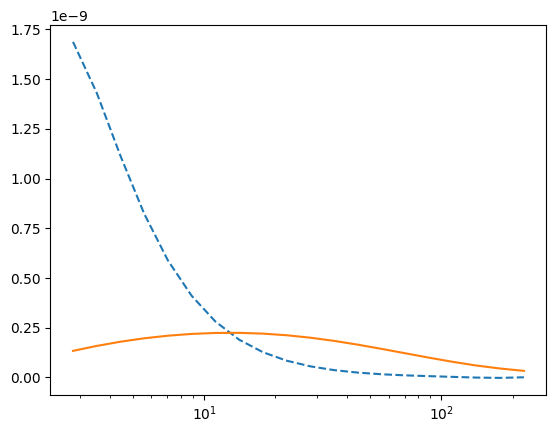

In [41]:
# get_power_BCMP_test.p_logc_Mz.shape
pl.figure()
pl.plot(get_corrfunc_BCMP_test.angles_data_array, get_corrfunc_BCMP_test.gty_1h_out_mat[:,3], ls='--')
pl.plot(get_corrfunc_BCMP_test.angles_data_array, get_corrfunc_BCMP_test.gty_2h_out_mat[:,3], ls='-')
pl.xscale('log')
# pl.xlim(0.8,100)
# pl.ylim(0.0,2e-9)
# pl.yscale('log')




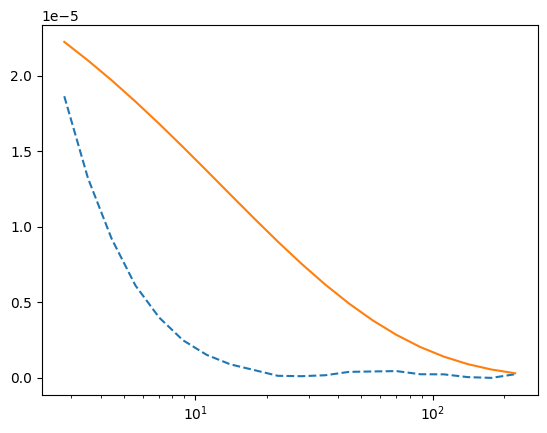

In [42]:
# get_power_BCMP_test.p_logc_Mz.shape
pl.figure()
pl.plot(get_corrfunc_BCMP_test.angles_data_array, get_corrfunc_BCMP_test.xip_1h_out_mat[:,3,3], ls='--')
pl.plot(get_corrfunc_BCMP_test.angles_data_array, get_corrfunc_BCMP_test.xip_2h_out_mat[:,3,3], ls='-')
pl.xscale('log')
# pl.xlim(0.8,100)
# pl.ylim(0.0,2e-4)
# pl.yscale('log')




In [157]:
# get_corrfunc_BCMP_test.theta_out_arcmin

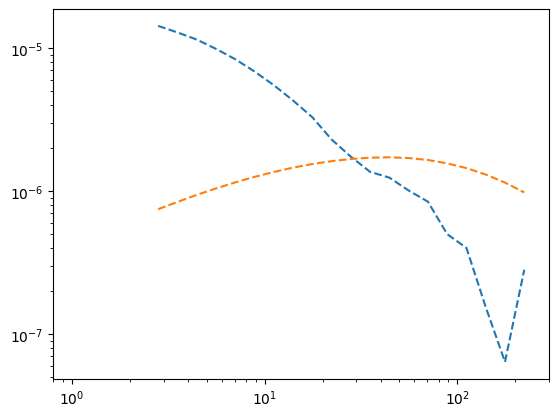

In [45]:
# get_power_BCMP_test.p_logc_Mz.shape
pl.figure()
pl.plot(get_corrfunc_BCMP_test.angles_data_array, get_corrfunc_BCMP_test.xim_1h_out_mat[:,3,3], ls='--')
pl.plot(get_corrfunc_BCMP_test.angles_data_array, get_corrfunc_BCMP_test.xim_2h_out_mat[:,3,3], ls='--')
pl.xscale('log')
pl.xlim(0.8,300)
# pl.ylim(0.0,2e-5)
pl.yscale('log')




In [46]:
# check if all the elements are finite
# np.all(np.isfinite(setup_power_BCMP_test.uk_dmb)), np.all(np.isfinite(setup_power_BCMP_test.uk_nfw))


In [47]:
# check if all the elements are finite
# np.all(np.isfinite(setup_power_BCMP_test.uyl_mat))
# get_power_BCMP_obj_test.Cl_kappa_y_1h_mat


In [48]:
# pl.figure()
# pl.plot(get_power_BCMP_obj_test.ell_array, get_power_BCMP_obj_test.Cl_kappa_y_1h_mat[3,:], ls='--')
# pl.plot(get_power_BCMP_obj_test.ell_array, get_power_BCMP_obj_test.Cl_kappa_y_2h_mat[3,:], ls='-')
# pl.xlim(32, 8096)
# # pl.ylim(1e-19, 5e-13)
# # pl.plot(get_power_BCMP_test.ell_array, (get_power_BCMP_test.ell_array**3) * (get_power_BCMP_test.Cl_kappa_y_1h_mat[3,:] + get_power_BCMP_test.Cl_kappa_y_2h_mat[3,:]), ls='-') 
# pl.xscale('log')
# pl.yscale('log')




In [49]:
# pl.figure()
# pl.plot(get_power_BCMP_obj_test.ell_array, get_power_BCMP_obj_test.Cl_kappa_kappa_1h_mat[3,3,:] + get_power_BCMP_obj_test.Cl_kappa_kappa_2h_mat[3,3,:], ls='--')
# pl.plot(get_power_BCMP_obj_test.ell_array, get_power_BCMP_obj_test.Cl_kappa_kappa_nfw_1h_mat[3,3,:] + get_power_BCMP_obj_test.Cl_kappa_kappa_2h_mat[3,3,:], ls='-')
# pl.xlim(32, 8096)
# # pl.ylim(1e-19, 5e-13)
# # pl.plot(get_power_BCMP_test.ell_array, (get_power_BCMP_test.ell_array**3) * (get_power_BCMP_test.Cl_kappa_y_1h_mat[3,:] + get_power_BCMP_test.Cl_kappa_y_2h_mat[3,:]), ls='-') 
# pl.xscale('log')
# pl.yscale('log')




In [52]:
C = jnp.array(df_data['COVMAT'].data[400:,400:])
data_vec = jnp.array(df_data['compton_shear'].data['VALUE'])
gty_data_to_plot = data_vec[60:]
gty_sig_to_plot = jnp.sqrt(jnp.diag(C))[60:]

C = jnp.array(df_data['COVMAT'].data[:200,:200])
data_vec = jnp.array(df_data['xip'].data['VALUE'])
bin1, bin2 = df_data['xip'].data['BIN1'], df_data['xip'].data['BIN2']
indsel = np.where((bin1==4) & (bin2==4))[0]
xip_data_to_plot = data_vec[indsel]
xip_sig_to_plot = jnp.sqrt(jnp.diag(C))[indsel]

C = jnp.array(df_data['COVMAT'].data[200:400,200:400])
data_vec = jnp.array(df_data['xim'].data['VALUE'])
bin1, bin2 = df_data['xim'].data['BIN1'], df_data['xim'].data['BIN2']
indsel = np.where((bin1==4) & (bin2==4))[0]
xim_data_to_plot = data_vec[indsel]
xim_sig_to_plot = jnp.sqrt(jnp.diag(C))[indsel]



Text(0.5, 0, '$\\theta$ (arcmin)')

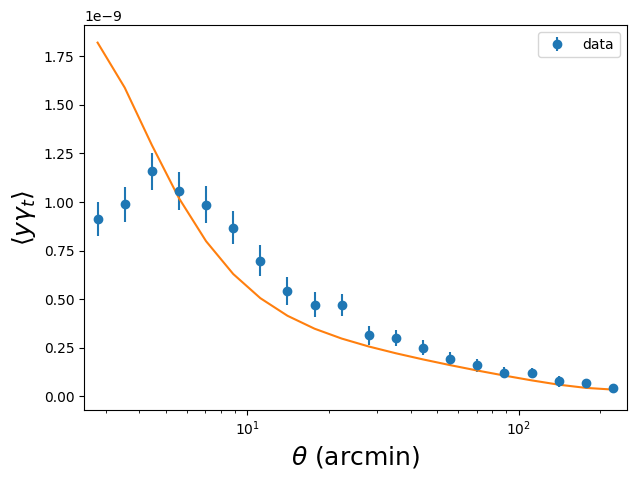

In [54]:
pl.figure(figsize=(7,5))
# pl.subplot(131)
pl.errorbar(analysis_dict['angles_data_array'], gty_data_to_plot, yerr=gty_sig_to_plot, fmt='o', label='data')
# for jt in range(len(theta_ej_all)):
pl.plot(analysis_dict['angles_data_array'], get_corrfunc_BCMP_test.gty_out_mat[:,3])
pl.legend()
pl.xscale('log')
pl.xlim(2.5,250)
# pl.ylim(0.0,2e-9)
# pl.title(r'Variation of $\theta_{ej}$')
pl.ylabel(r'$\langle y \gamma_t \rangle$', size=18)
pl.xlabel(r'$\theta$ (arcmin)', size=18)


In [55]:
get_corrfunc_BCMP_test.xip_out_mat.shape

(20, 4, 4)

Text(0.5, 0, '$\\theta$ (arcmin)')

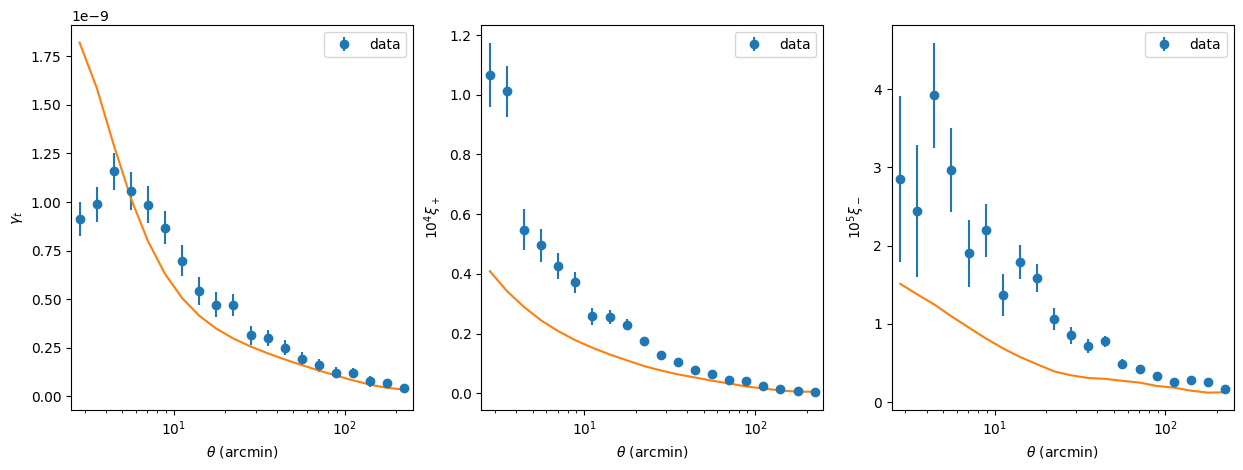

In [57]:
# make a three panel plot, plotting all the theta_ej curves for for gty_out_thetaej[:,3,:], xip_out_thetaej[:,3,3,:], xim_out_thetaej[:,3,3,:]
# draw theta_ej curves from a colormap

pl.figure(figsize=(15,5))
pl.subplot(131)
pl.errorbar(analysis_dict['angles_data_array'], gty_data_to_plot, yerr=gty_sig_to_plot, fmt='o', label='data')
pl.plot(analysis_dict['angles_data_array'], get_corrfunc_BCMP_test.gty_out_mat[:,3])
pl.legend()
pl.xscale('log')
pl.xlim(2.5,250)
# pl.ylim(0.0,2e-9)
pl.ylabel(r'$\gamma_t$')
pl.xlabel(r'$\theta$ (arcmin)')
# pl.title('1-halo term')
pl.subplot(132)
pl.errorbar(analysis_dict['angles_data_array'], 1e4*xip_data_to_plot, yerr=1e4*xip_sig_to_plot, fmt='o', label='data')
pl.plot(analysis_dict['angles_data_array'], 1e4*get_corrfunc_BCMP_test.xip_out_mat[:,3,3])
pl.legend()
pl.xscale('log')
pl.xlim(2.5,250)
# pl.ylim(0.0,2e-9)
pl.ylabel(r'$10^4 \xi_+$')
pl.xlabel(r'$\theta$ (arcmin)')
# pl.title('2-halo term')
pl.subplot(133)
pl.errorbar(analysis_dict['angles_data_array'], 1e5*xim_data_to_plot, yerr=1e5*xim_sig_to_plot, fmt='o', label='data')
pl.plot(analysis_dict['angles_data_array'], 1e5*get_corrfunc_BCMP_test.xim_out_mat[:,3,3])
pl.legend()
pl.legend()
pl.xscale('log')
pl.xlim(2.5,250)
# pl.ylim(0.0,2e-9)
pl.ylabel(r'$10^5 \xi_-$')
pl.xlabel(r'$\theta$ (arcmin)')
# pl.title('2-halo term')






In [138]:
analysis_dict['angles_data_array']

Array([  2.80504614,   3.53134386,   4.44569853,   5.59680285,
         7.04595733,   8.87033473,  11.1670898 ,  14.05853313,
        17.69864461,  22.28127345,  28.05046136,  35.31343862,
        44.45698525,  55.96802846,  70.45957328,  88.70334731,
       111.67089804, 140.5853313 , 176.9864461 , 222.81273453],      dtype=float64)

In [52]:
# from colossus.lss import bias
# bM = bias.haloBias(setup_power_BCMP_test.M_array, 0.0, mdef='200c', model='tinker10')

# # dndm_jax.shape
# pl.figure()
# pl.plot(setup_power_BCMP_test.M_array, setup_power_BCMP_test.bias_Mz_mat[0,:])
# pl.plot(setup_power_BCMP_test.M_array, bM, ls='--')
# pl.xscale('log')
# # pl.yscale('log')





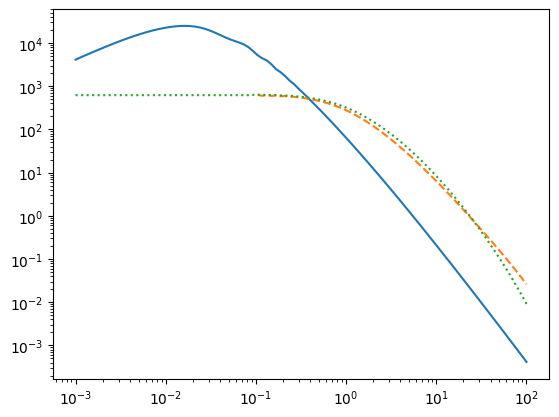

In [71]:
pl.figure()
pl.plot(setup_power_BCMP_test.kPk_array, setup_power_BCMP_test.plin_kz_mat[:,0])
pl.plot(setup_power_BCMP_test.kPk_array, setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0], ls='--')
pl.plot(setup_power_BCMP_test.kPk_array, setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0], ls=':')
pl.xscale('log')
pl.yscale('log')



(0.69, 1.5)

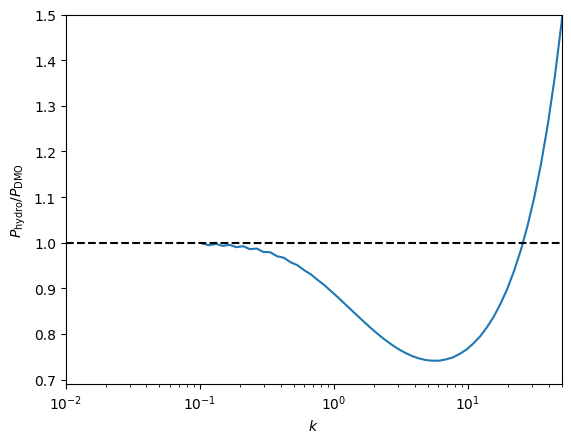

In [72]:
Pk_nfw = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_nfw_1h_mat[:,0]
Pk_dmb = setup_power_BCMP_test.plin_kz_mat[:,0] + setup_power_BCMP_test.Pmm_dmb_1h_mat[:,0]
pl.figure()
pl.plot(setup_power_BCMP_test.kPk_array, (Pk_dmb)/Pk_nfw)
pl.xscale('log')
pl.axhline(1.0, color='k', ls='--')
pl.xlim(1e-2, 50)
pl.xlabel(r'$k$')
pl.ylabel(r'$P_{\rm hydro}/P_{\rm DMO}$')
pl.ylim(0.69,1.5)
# pl.yscale('log')




In [157]:
# setup_power_BCMP_test.Pmm_dmb_1h_mat.shape
# setup_power_BCMP_test.kPk_array
# setup_power_BCMP_test.uk_nfw_Pk[:,0,0,0]
# setup_power_BCMP_test.uk_dmb_Pk[:,0,0,0]
setup_power_BCMP_test.uk_dmb[:,0,0,0]
# (Pk_dmb)
# Pk_nfw

Array([-4.00917588e+01,  3.15555364e+01, -2.16192225e+01,  1.77459096e+01,
       -1.13110086e+01,  1.00646361e+01, -5.59863161e+00,  5.82615607e+00,
       -2.46205120e+00,  3.51198095e+00, -7.60692354e-01,  2.26615259e+00,
        1.47099797e-01,  1.60821567e+00,  6.20517368e-01,  1.26999674e+00,
        8.59309159e-01,  1.10289208e+00,  9.73576649e-01,  1.02530177e+00,
        1.02326095e+00,  9.92894412e-01,  1.04037961e+00,  9.81820950e-01,
        1.04144753e+00,  9.79233196e-01,  1.03430317e+00,  9.77881133e-01,
        1.02173048e+00,  9.72954473e-01,  1.00324800e+00,  9.60173240e-01,
        9.75929867e-01,  9.34720194e-01,  9.34983657e-01,  8.91115466e-01,
        8.74892490e-01,  8.24497564e-01,  7.91847864e-01,  7.33499282e-01,
        6.87197189e-01,  6.23330663e-01,  5.69473224e-01,  5.05703063e-01,
        4.51729914e-01,  3.93745303e-01,  3.45207093e-01,  2.96172389e-01,
        2.55588807e-01,  2.16272309e-01,  1.84131210e-01,  1.53955105e-01,
        1.29576529e-01,  

In [156]:
setup_power_BCMP_test.k

Array([8.54534660e-03, 1.00000000e-02, 1.17022755e-02, 1.36943251e-02,
       1.60254765e-02, 1.87534541e-02, 2.19458086e-02, 2.56815898e-02,
       3.00533038e-02, 3.51692040e-02, 4.11559714e-02, 4.81618515e-02,
       5.63603253e-02, 6.59544053e-02, 7.71816620e-02, 9.03201070e-02,
       1.05695077e-01, 1.23687291e-01, 1.44742275e-01, 1.69381398e-01,
       1.98214778e-01, 2.31956394e-01, 2.71441762e-01, 3.17648627e-01,
       3.71721174e-01, 4.34998358e-01, 5.09047061e-01, 5.95700894e-01,
       6.97105597e-01, 8.15772173e-01, 9.54639070e-01, 1.11714494e+00,
       1.30731378e+00, 1.52985460e+00, 1.79027800e+00, 2.09503263e+00,
       2.45166490e+00, 2.86900580e+00, 3.35738962e+00, 3.92890982e+00,
       4.59771851e+00, 5.38037685e+00, 6.29626521e+00, 7.36806300e+00,
       8.62231029e+00, 1.00900650e+01, 1.18076721e+01, 1.38176631e+01,
       1.61698100e+01, 1.89223571e+01, 2.21434636e+01, 2.59128911e+01,
       3.03239790e+01, 3.54859556e+01, 4.15266428e+01, 4.85956213e+01,
      

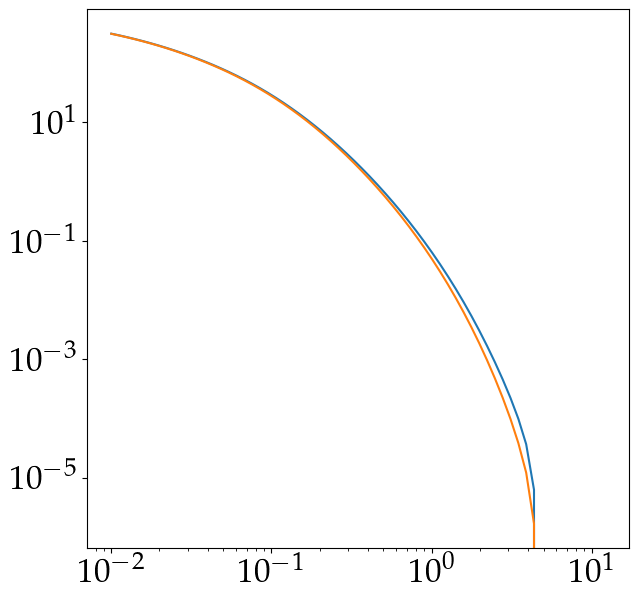

In [63]:
# Ptot_mat.shape
import matplotlib.pyplot as pl
import matplotlib
%matplotlib inline

pl.figure()
pl.plot(BCMP_test.r_array, BCMP_test.Ptot_mat[:,0,0,0])
pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,0,0,0])
pl.xscale('log')
pl.yscale('log')
pl.show()




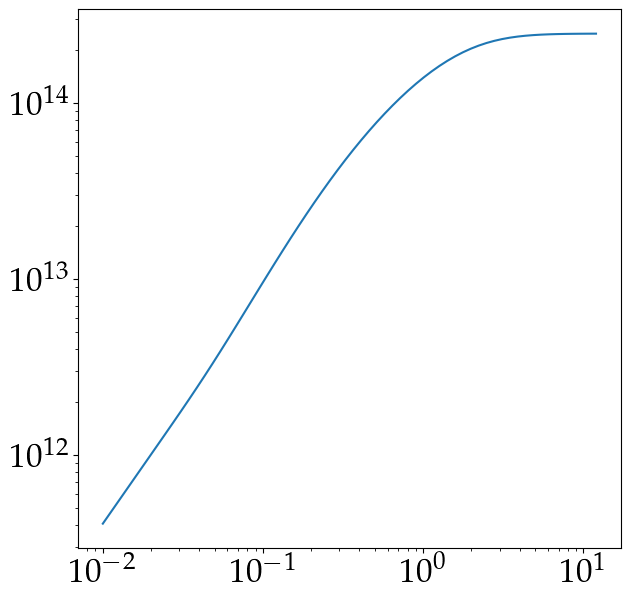

In [64]:
# Ptot_mat.shape
import matplotlib.pyplot as pl
import matplotlib
%matplotlib inline

pl.figure()
pl.plot(BCMP_test.r_array, BCMP_test.Mdmb_mat[:,0,0,0])
# pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,0,0,0])
pl.xscale('log')
pl.yscale('log')
pl.show()




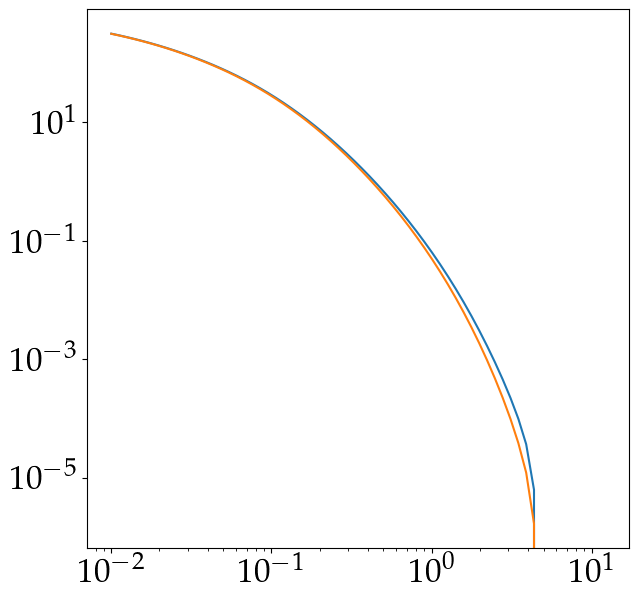

In [65]:
# Ptot_mat.shape
import matplotlib.pyplot as pl
import matplotlib
%matplotlib inline

pl.figure()
pl.plot(BCMP_test.r_array, BCMP_test.Ptot_mat[:,0,0,0])
pl.plot(BCMP_test.r_array, BCMP_test.Pth_mat[:,0,0,0])
pl.xscale('log')
pl.yscale('log')
pl.show()




In [66]:
%%time
vmap_func1 = vmap(BCMP_test.get_rho_gas_normed, (0, None, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
rho_gas_normed_mat = vmap_func4(jnp.arange(len(BCMP_test.r_array)), jnp.arange(len(BCMP_test.conc_array)), jnp.arange(len(BCMP_test.z_array)), jnp.arange(len(BCMP_test.M200c_array))).T



CPU times: user 222 ms, sys: 0 ns, total: 222 ms
Wall time: 171 ms


In [67]:
%%time
vmap_func1 = vmap(BCMP_test.get_rho_clm, (0, None, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
rho_clm_normed_mat = vmap_func4(jnp.arange(len(BCMP_test.r_array)), jnp.arange(len(BCMP_test.conc_array)), jnp.arange(len(BCMP_test.z_array)), jnp.arange(len(BCMP_test.M200c_array))).T



CPU times: user 759 ms, sys: 16.4 ms, total: 775 ms
Wall time: 422 ms


In [68]:
%%time
vmap_func1 = vmap(BCMP_test.get_rho_cga, (0, None, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
rho_cga_normed_mat = vmap_func4(jnp.arange(len(BCMP_test.r_array)), jnp.arange(len(BCMP_test.conc_array)), jnp.arange(len(BCMP_test.z_array)), jnp.arange(len(BCMP_test.M200c_array))).T



CPU times: user 236 ms, sys: 0 ns, total: 236 ms
Wall time: 153 ms


In [69]:
%%time
vmap_func1 = vmap(BCMP_test.get_rho_dmb, (0, None, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
rho_dmb_normed_mat = vmap_func4(jnp.arange(len(BCMP_test.r_array)), jnp.arange(len(BCMP_test.conc_array)), jnp.arange(len(BCMP_test.z_array)), jnp.arange(len(BCMP_test.M200c_array))).T



CPU times: user 922 ms, sys: 36.1 ms, total: 959 ms
Wall time: 543 ms


In [94]:
%%time
vmap_func1 = vmap(BCMP_test.get_rho_nfw_normed, (0, None, None, None))
vmap_func2 = vmap(vmap_func1, (None, 0, None, None))
vmap_func3 = vmap(vmap_func2, (None, None, 0, None))
vmap_func4 = vmap(vmap_func3, (None, None, None, 0))
rho_nfw_normed_mat = vmap_func4(jnp.arange(len(BCMP_test.r_array)), jnp.arange(len(BCMP_test.conc_array)), jnp.arange(len(BCMP_test.z_array)), jnp.arange(len(BCMP_test.M200c_array))).T



CPU times: user 153 ms, sys: 4.86 ms, total: 158 ms
Wall time: 196 ms


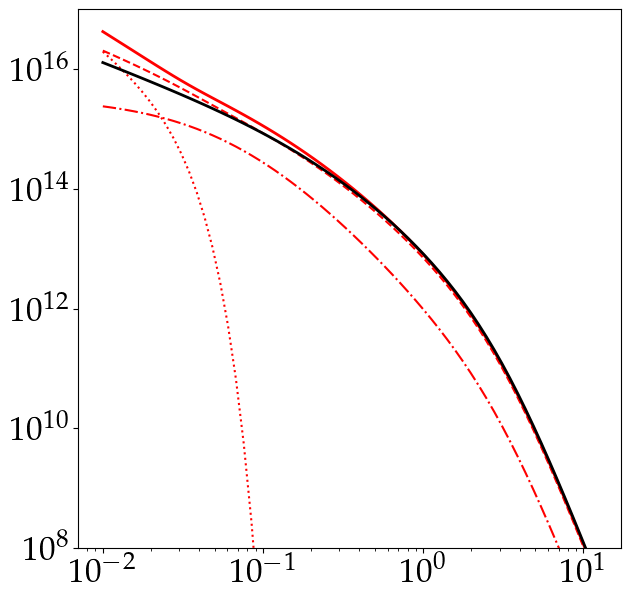

In [71]:
pl.figure()
pl.plot(BCMP_test.r_array, rho_gas_normed_mat[:,0,0,0], ls='-.', color='r')
pl.plot(BCMP_test.r_array, rho_clm_normed_mat[:,0,0,0], ls='--', color='r')
pl.plot(BCMP_test.r_array, rho_cga_normed_mat[:,0,0,0], ls=':', color='r')
pl.plot(BCMP_test.r_array, rho_dmb_normed_mat[:,0,0,0], ls='-', color='r', lw=2)
pl.plot(BCMP_test.r_array, rho_nfw_normed_mat[:,0,0,0], ls='-', color='k', lw=2)
pl.xscale('log')
pl.yscale('log')
pl.ylim(1e8, 1e17)
pl.show()






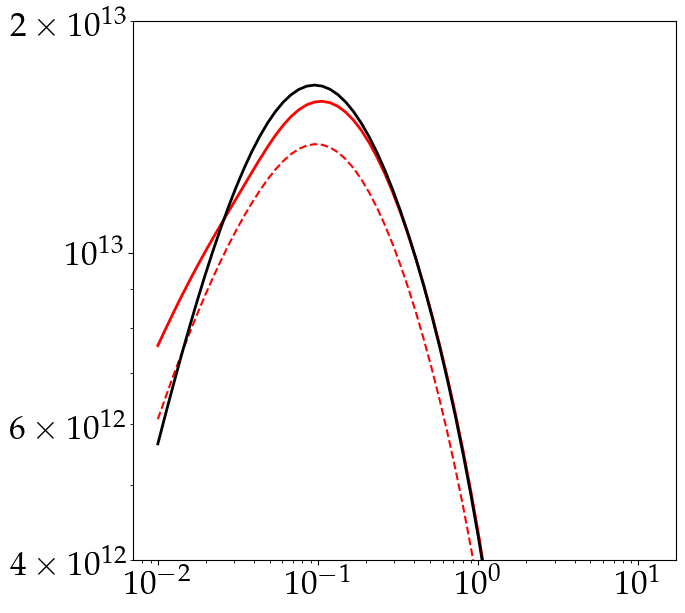

In [77]:
pl.figure()
pl.plot(BCMP_test.r_array, (BCMP_test.r_array**2)*rho_gas_normed_mat[:,-5,0,0], ls='-.', color='r')
pl.plot(BCMP_test.r_array, (BCMP_test.r_array**2)*rho_clm_normed_mat[:,-5,0,0], ls='--', color='r')
pl.plot(BCMP_test.r_array, (BCMP_test.r_array**2)*rho_cga_normed_mat[:,-5,0,0], ls=':', color='r')
pl.plot(BCMP_test.r_array, (BCMP_test.r_array**2)*rho_dmb_normed_mat[:,-5,0,0], ls='-', color='r', lw=2)
pl.plot(BCMP_test.r_array, (BCMP_test.r_array**2)*rho_nfw_normed_mat[:,-5,0,0], ls='-', color='k', lw=2)
pl.xscale('log')
pl.yscale('log')
pl.ylim(4e12,2e13)
# pl.ylim(1e8, 1e17)
pl.show()






In [91]:
# BCMP_test.conc_array[-5]
from mcfit import xi2P


In [104]:
Mtot_rep = jnp.repeat(BCMP_test.Mtot_mat[None, :, :, :], len(BCMP_test.r_array), axis=0)


In [103]:
BCMP_test.Mtot_mat.shape


(16, 64, 64)

In [109]:
k, P_nfw = xi2P(BCMP_test.r_array)(BCMP_test.rho_nfw_mat/Mnfw_rep, axis=0)



In [108]:
k, P_dmb = xi2P(BCMP_test.r_array)(BCMP_test.rho_dmb_mat/Mnfw_rep, axis=0)



In [128]:
window = jnp.ones(5) / 5
y_smooth = jnp.convolve(P_nfw[:,-5,0,0], window, mode='same')



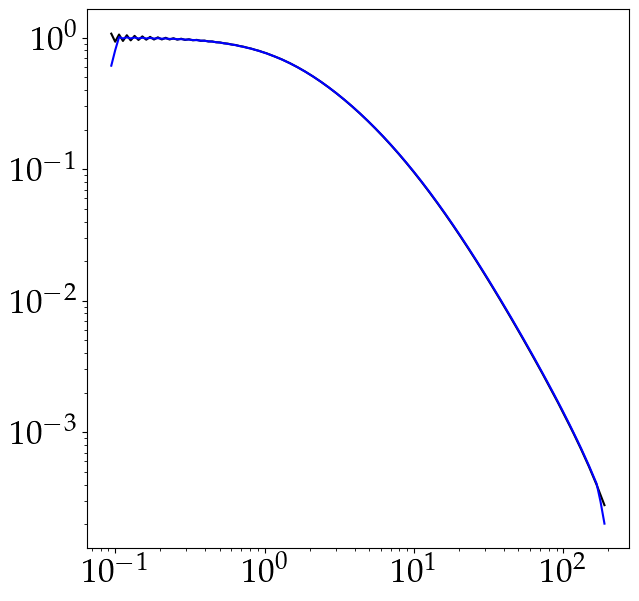

In [131]:
pl.figure()
indc = 3
window = jnp.ones(5) / 5
# pl.plot(k, (k**3) * P_nfw[:,indc,0,0], color='k')
# pl.plot(k, (k**3) * jnp.convolve(P_nfw[:,indc,0,0], window, mode='same'), color='b')
pl.plot(k, P_nfw[:,indc,0,0], color='k')
pl.plot(k, jnp.convolve(P_nfw[:,indc,0,0], window, mode='same'), color='b')

pl.xscale('log')
pl.yscale('log')




In [ ]:
from jax_cosmo.power import sigmasqr

